<a href="https://colab.research.google.com/github/rlawnsqja2/2024-1-my-BDA/blob/main/inclass/07w_0416_thu_B_ch08_seaborn_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 07주차 B반

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.2 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

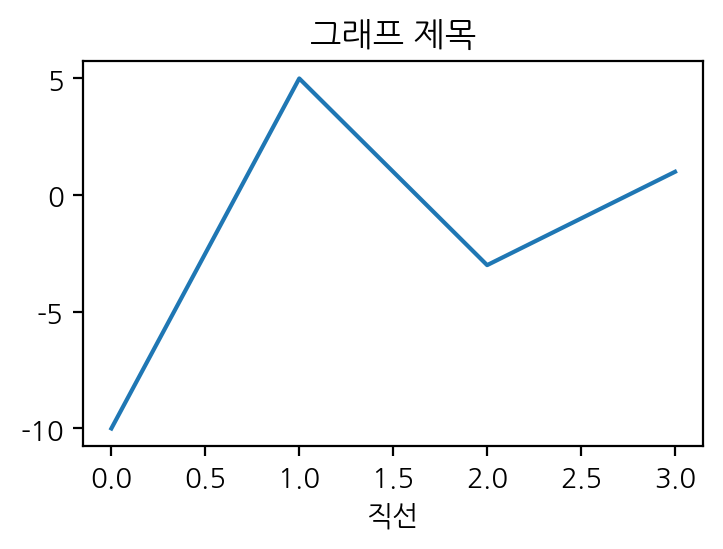

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

---

# 08 그래프 만들기

## 08-1 파이썬으로 만들 수 있는 그래프 살펴보기

## 08-2 산점도 - 변수 간 관계 표현하기

### 산점도 만들기

In [8]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.21 MiB/s, done.


In [9]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [11]:
mpg.describe(include="all")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


In [12]:
mpg.count() # NaN이 아닌 행수

manufacturer    234
model           234
displ           234
year            234
cyl             234
trans           234
drv             234
cty             234
hwy             234
fl              234
category        234
dtype: int64

In [13]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [14]:
mpg.isna().sum().sum()

0

In [15]:
mpg.shape

(234, 11)

In [112]:
mpg.shape[0]

234

In [113]:
mpg.shape[1]

11

In [16]:
mpg.fl.value_counts()

fl
r    168
p     52
e      8
d      5
c      1
Name: count, dtype: int64

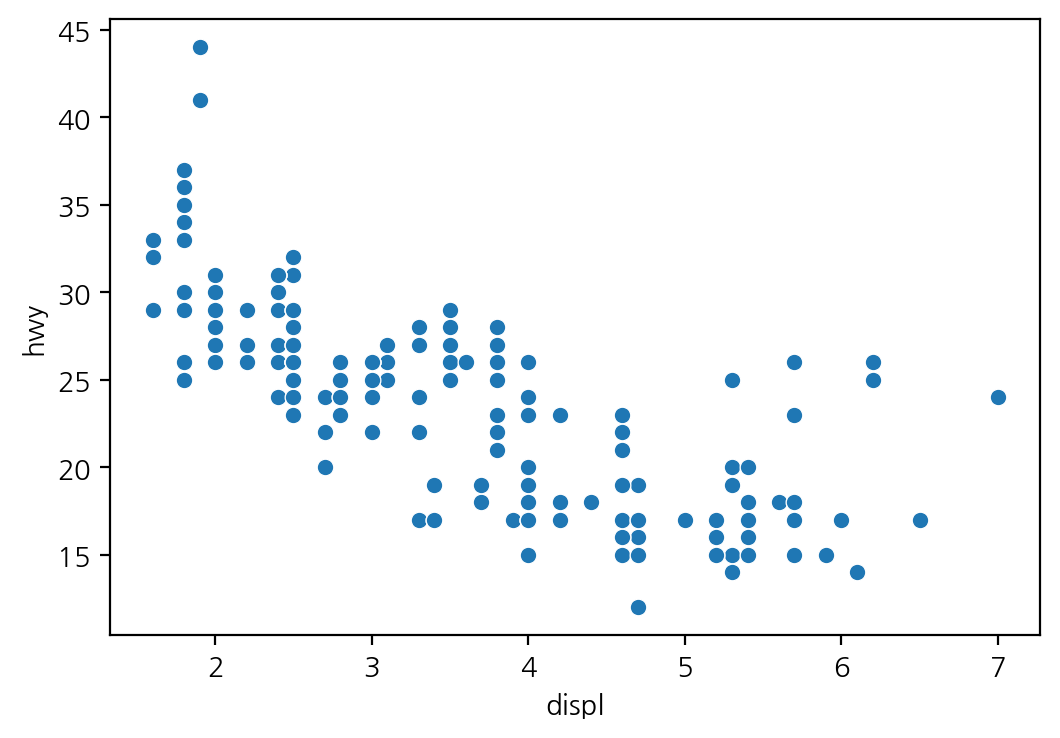

In [114]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

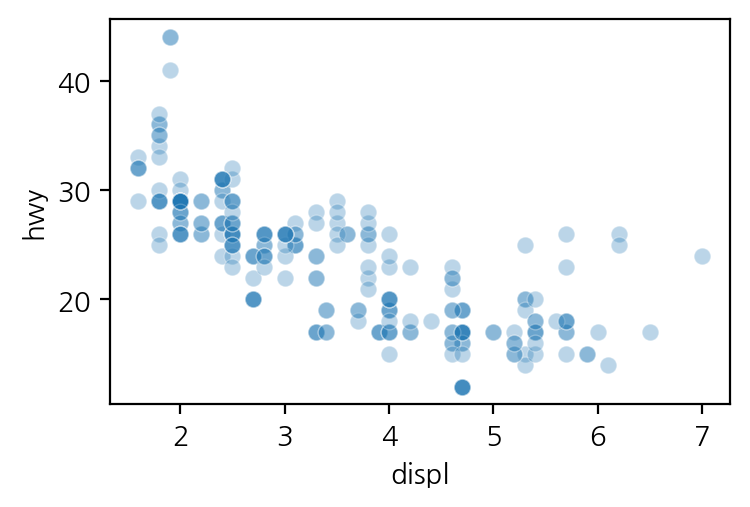

In [ ]:
# x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.3);

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.7]})        # 그림 크기, 기본값 [6, 4]

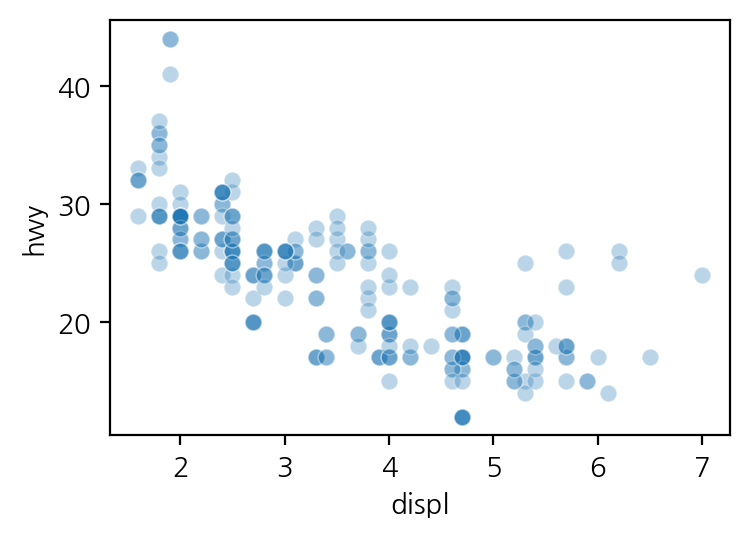

In [19]:
sns.scatterplot(mpg, x = 'displ', y = 'hwy', alpha=.3);

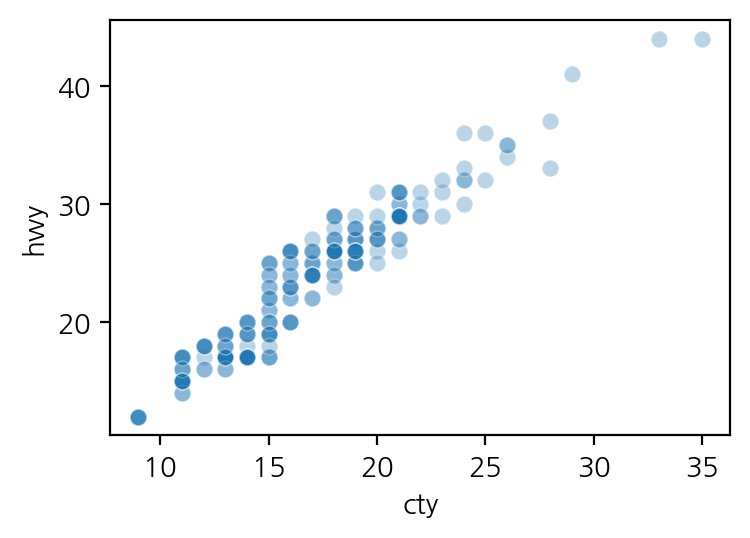

In [20]:
sns.scatterplot(mpg, x = 'cty', y = 'hwy', alpha=.3);

#### 축 범위 설정하기

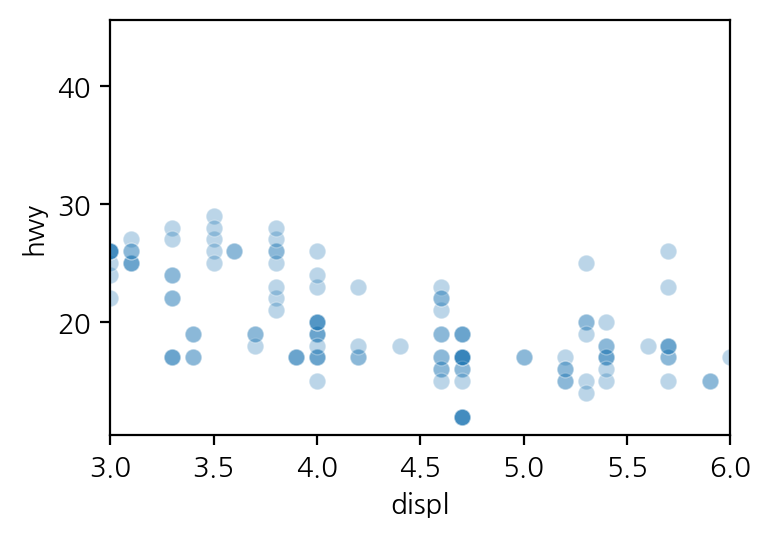

In [21]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', alpha=.3).set(xlim = [3, 6]);

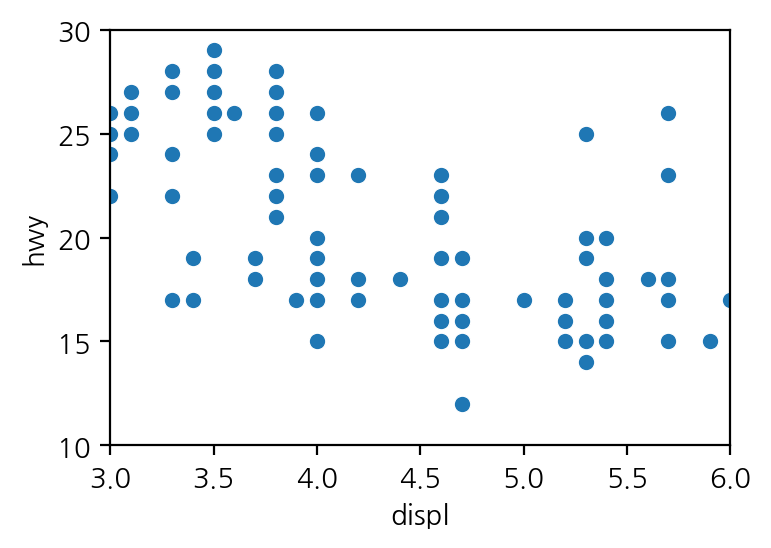

In [22]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3, 6], ylim = [10, 30]);

#### 종류별로 표식 색깔 바꾸기

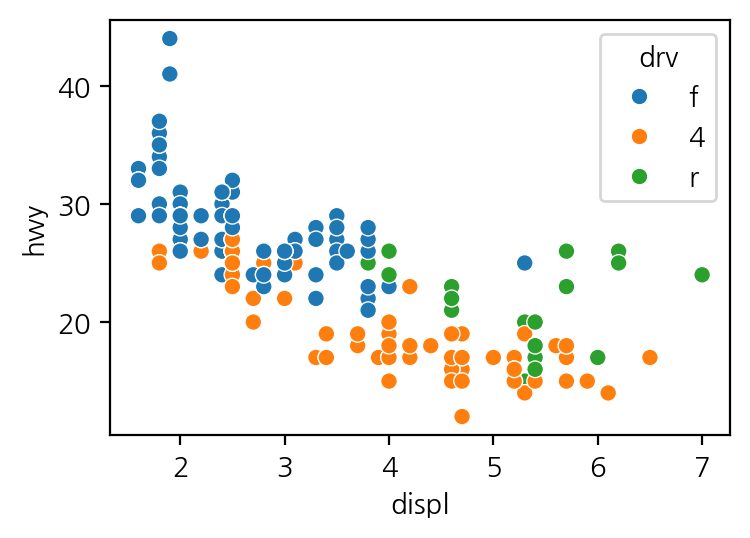

In [23]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv');

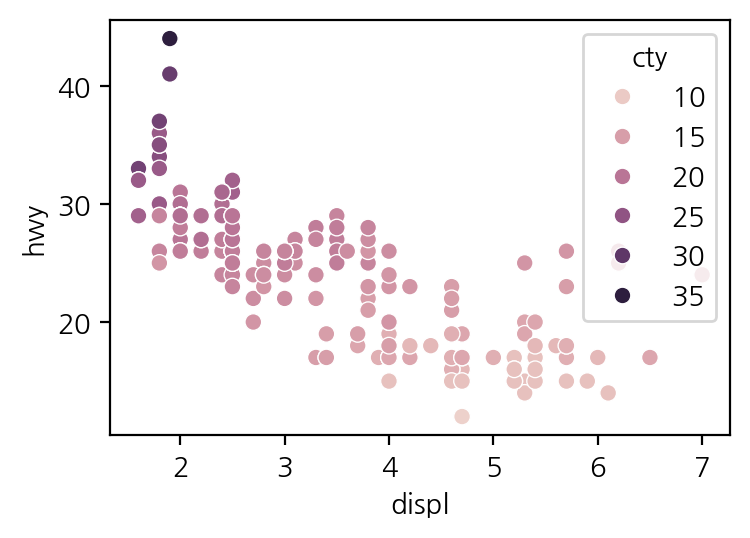

In [24]:
# drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'cty');

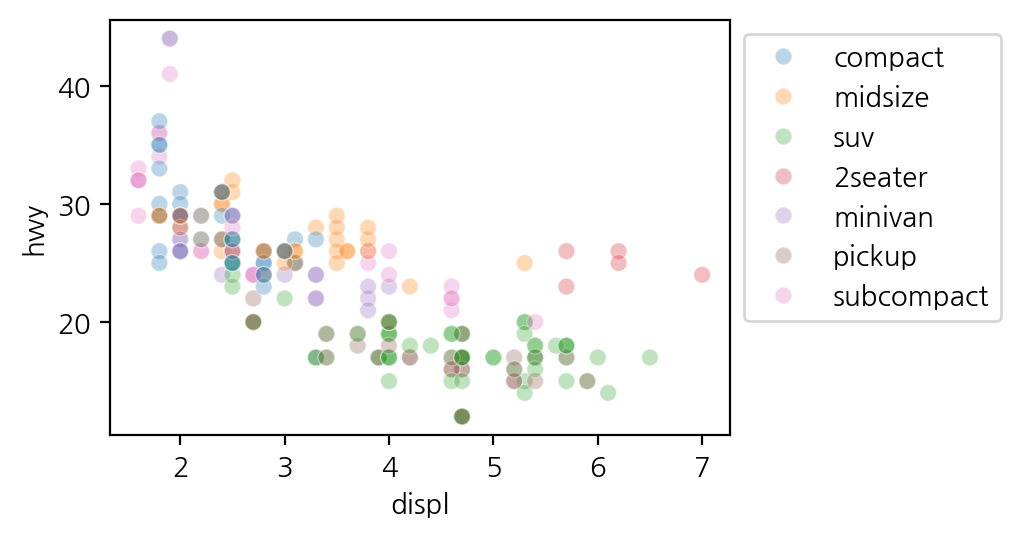

In [25]:
import matplotlib.pyplot as plt
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category', alpha=.3);
plt.legend(loc=2, bbox_to_anchor=(1, 1));

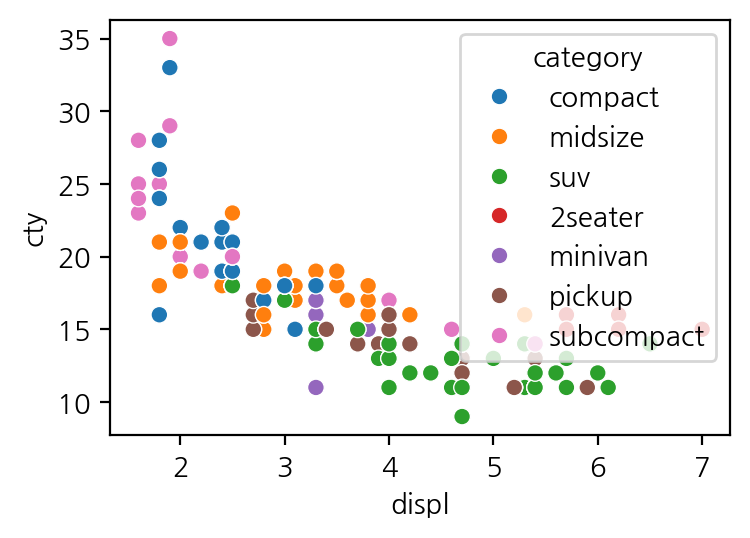

In [26]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'category');

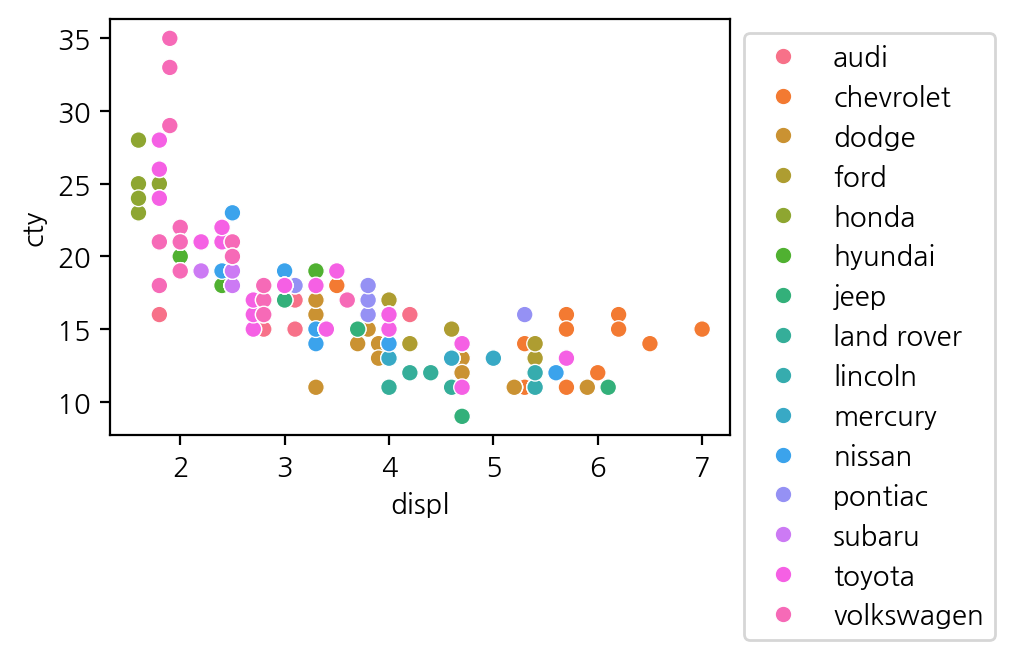

In [27]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'manufacturer');
# plt.legend(loc='best');
plt.legend(bbox_to_anchor=(1., 1.)); # 범례의 완쪽 모서리의 위치 지정, 1, 1: 원 그래프의 오른쪽 위 모서리

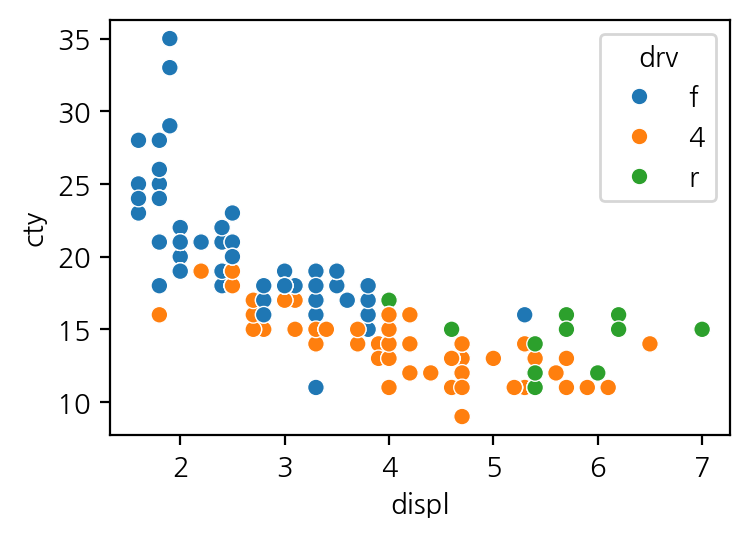

In [28]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'drv');

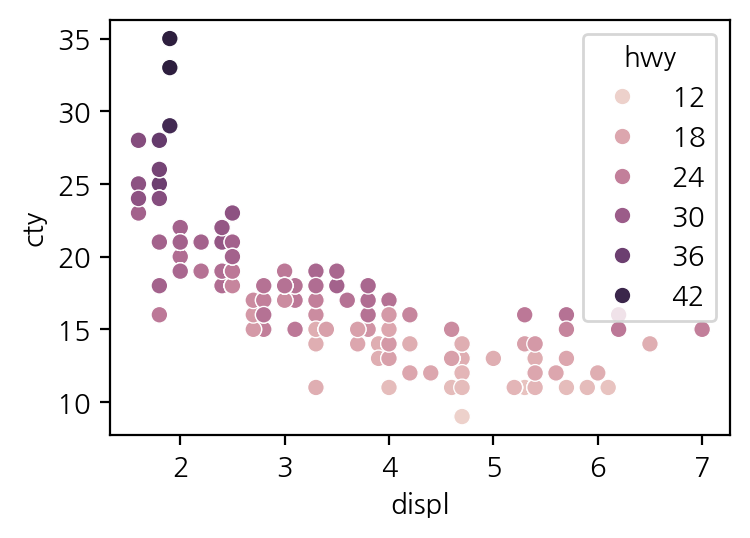

In [29]:
sns.scatterplot(data = mpg, x = 'displ', y = 'cty', hue = 'hwy');

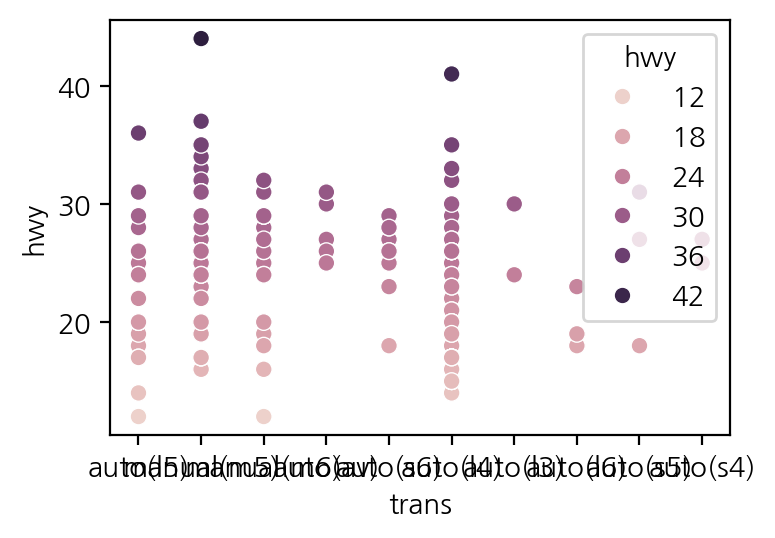

In [30]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

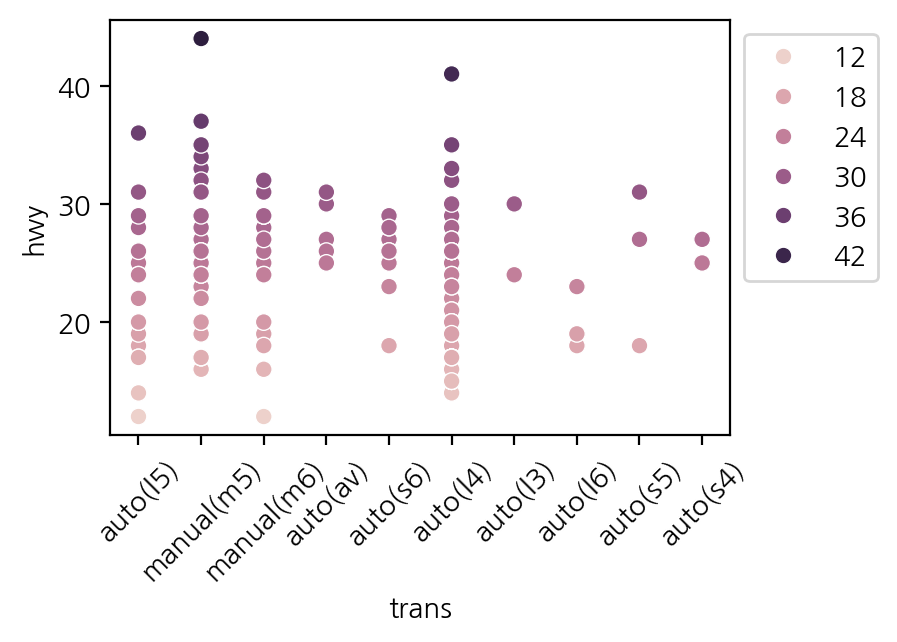

In [31]:
my_plot = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
my_plot.tick_params(axis='x', labelrotation = 45)
my_plot.legend(bbox_to_anchor=(1., 1.));

------------------------------------------------------------------------

#### (알아 두면 좋아요) 그래프 활용하기

**그래프 설정 바꾸기**

In [32]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [5, 3]})        # 그림 크기, 기본값 [6, 4]

---

## 08-3 막대 그래프 - 집단 간 차이 표현하기

### 평균 막대 그래프 만들기

#### 1. 집단별 평균표 만들기

In [115]:
mpg.groupby('drv')['hwy'].mean()

drv
4    19.17
f    28.16
r    21.00
Name: hwy, dtype: float64

In [33]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [34]:
# drv별 분리
# hwy 평균 구하기
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


#### 2. 그래프 만들기

In [35]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [4, 2.5]})        # 그림 크기, 기본값 [6, 4]

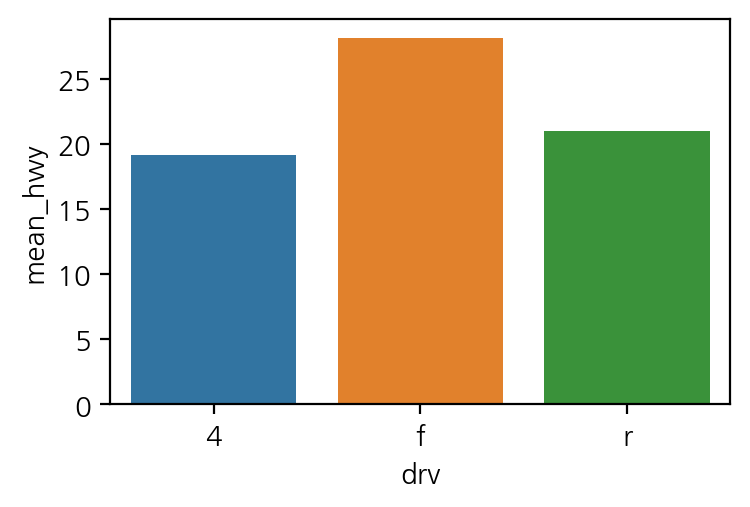

In [36]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv');

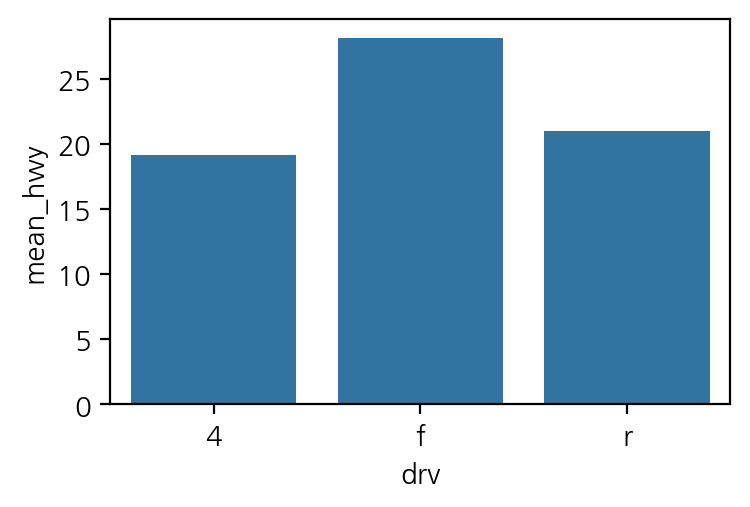

In [37]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

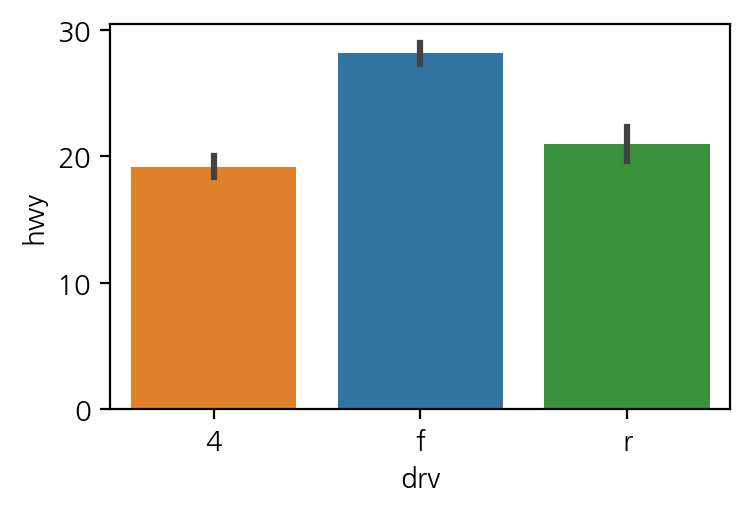

In [38]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'drv', order = ['4', 'f', 'r']);

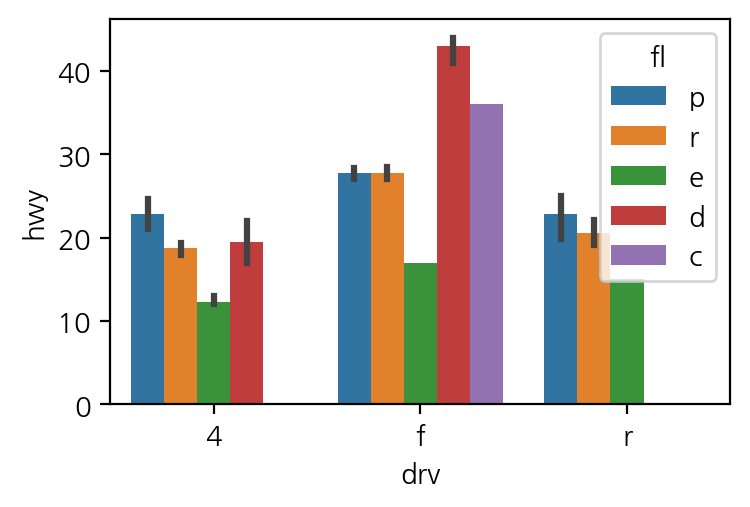

In [39]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'fl', order = ['4', 'f', 'r']);

#### 3. 크기순으로 정렬하기

In [40]:
pd.set_option('display.precision', 2)

df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
df_mpg

,drv,mean_hwy
1,f,28.16
2,r,21.00
0,4,19.17


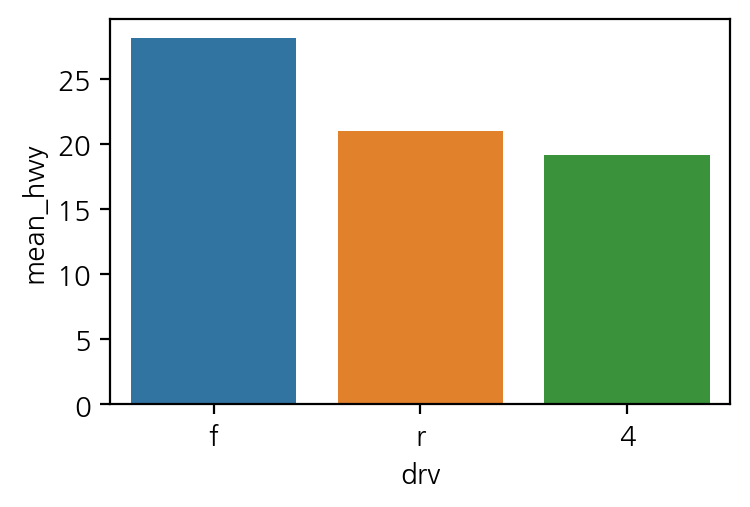

In [41]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv');

In [42]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.00,234.00,234.00,234,234,234.00,234.00,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.47,2003.50,5.89,NaN,NaN,16.86,23.44,NaN,NaN
std,NaN,NaN,1.29,4.51,1.61,NaN,NaN,4.26,5.95,NaN,NaN
min,NaN,NaN,1.60,1999.00,4.00,NaN,NaN,9.00,12.00,NaN,NaN
25%,NaN,NaN,2.40,1999.00,4.00,NaN,NaN,14.00,18.00,NaN,NaN
50%,NaN,NaN,3.30,2003.50,6.00,NaN,NaN,17.00,24.00,NaN,NaN
75%,NaN,NaN,4.60,2008.00,8.00,NaN,NaN,19.00,27.00,NaN,NaN


### 빈도 막대 그래프 만들기

#### 1. 집단별 빈도표 만들기


In [43]:
mpg.groupby('drv', as_index = False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [44]:
mpg.groupby('drv', as_index = False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [45]:
# 집단별 빈도표 만들기
mpg.groupby('drv', as_index = False).count()[['drv', 'model']].rename(columns = {'model': 'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [116]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [117]:
# 집단별 빈도표 만들기, 시험 예상
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [48]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


#### 2. 그래프 만들기

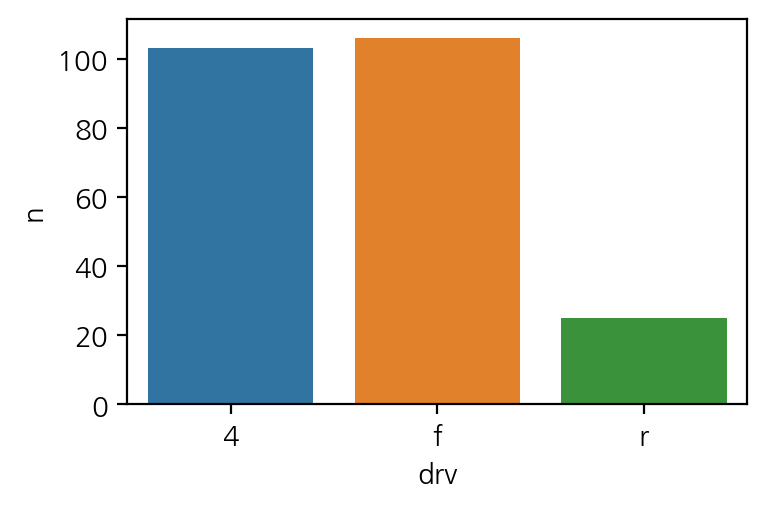

In [49]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n', hue = 'drv');

#### sns.countplot()으로 빈도 막대 그래프 만들기

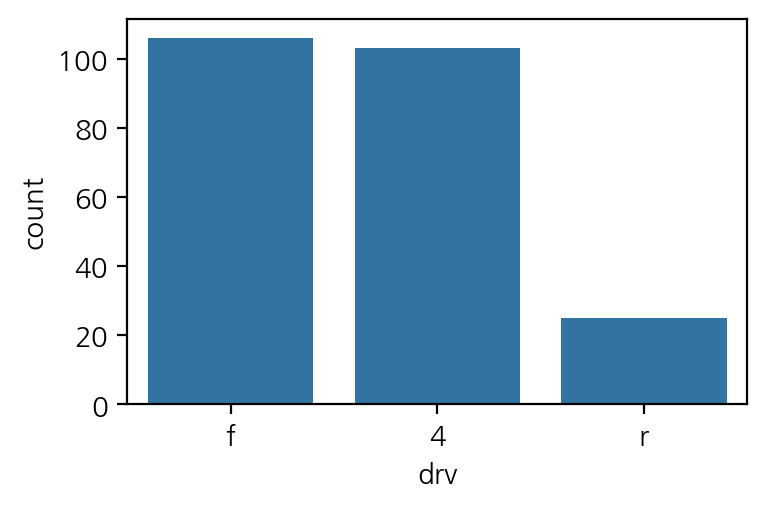

In [50]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv');

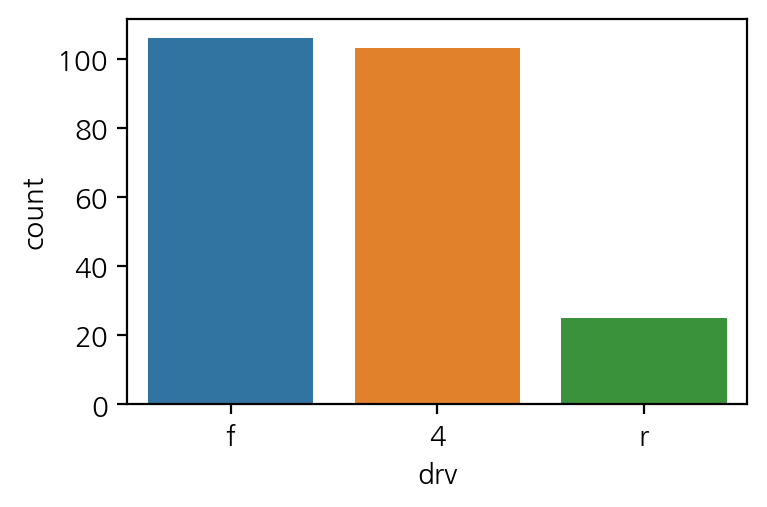

In [51]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv', hue = 'drv');

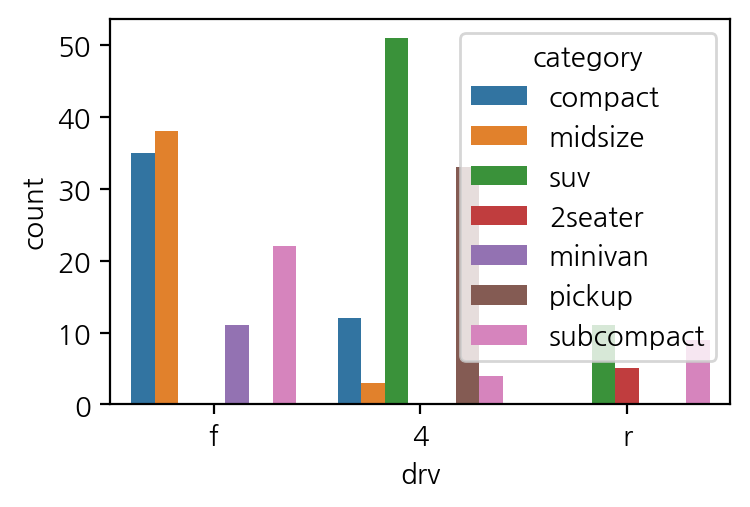

In [52]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv', hue = 'category');

In [53]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [54]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

**막대 정렬하기**

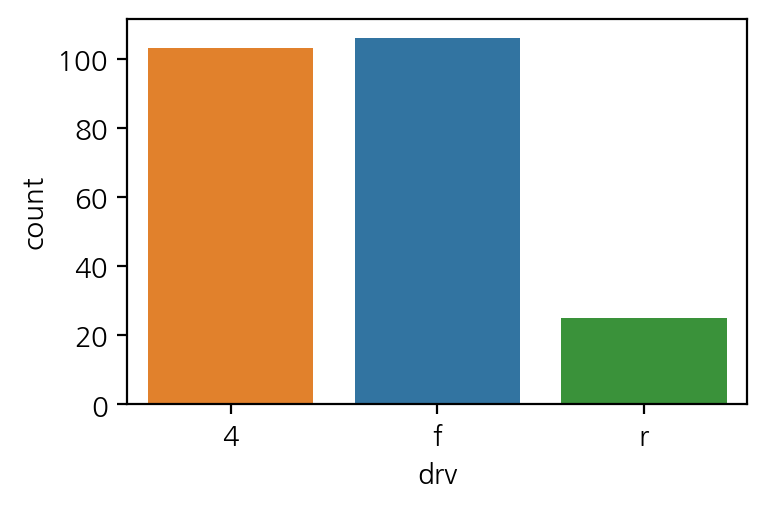

In [55]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', hue = 'drv', order = ['4', 'f', 'r']);

In [56]:
mpg['drv'].value_counts()

drv
f    106
4    103
r     25
Name: count, dtype: int64

In [57]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

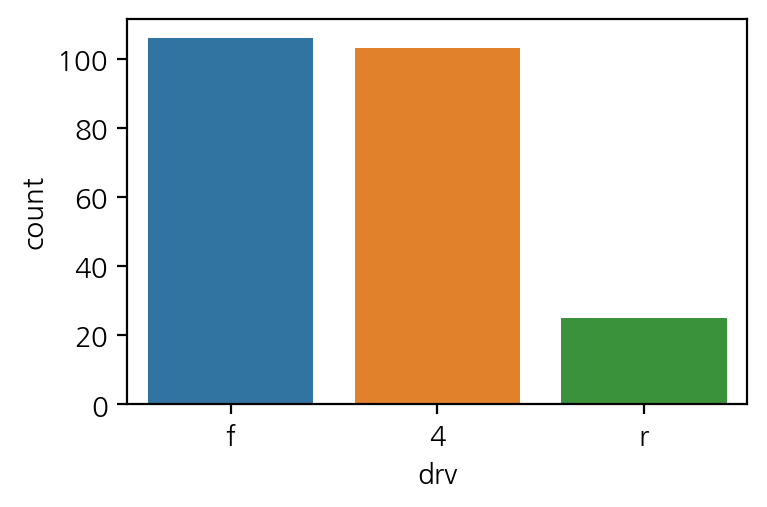

In [58]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', hue = 'drv', order = mpg['drv'].value_counts().index);

## 08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

### 시계열 그래프 만들기

In [59]:
# economics 데이터 불러오기
economics = pd.read_csv('data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [118]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 33.8+ KB


## Format: A data frame with 574 rows and 6 variables:
- date: Month of data collection
- pce: personal consumption expenditures, in billions of dollars,
- pop: total population, in thousands
- psavert: personal savings rate
- uempmed: median duration of unemployment, in weeks
- unemploy: number of unemployed in thousands

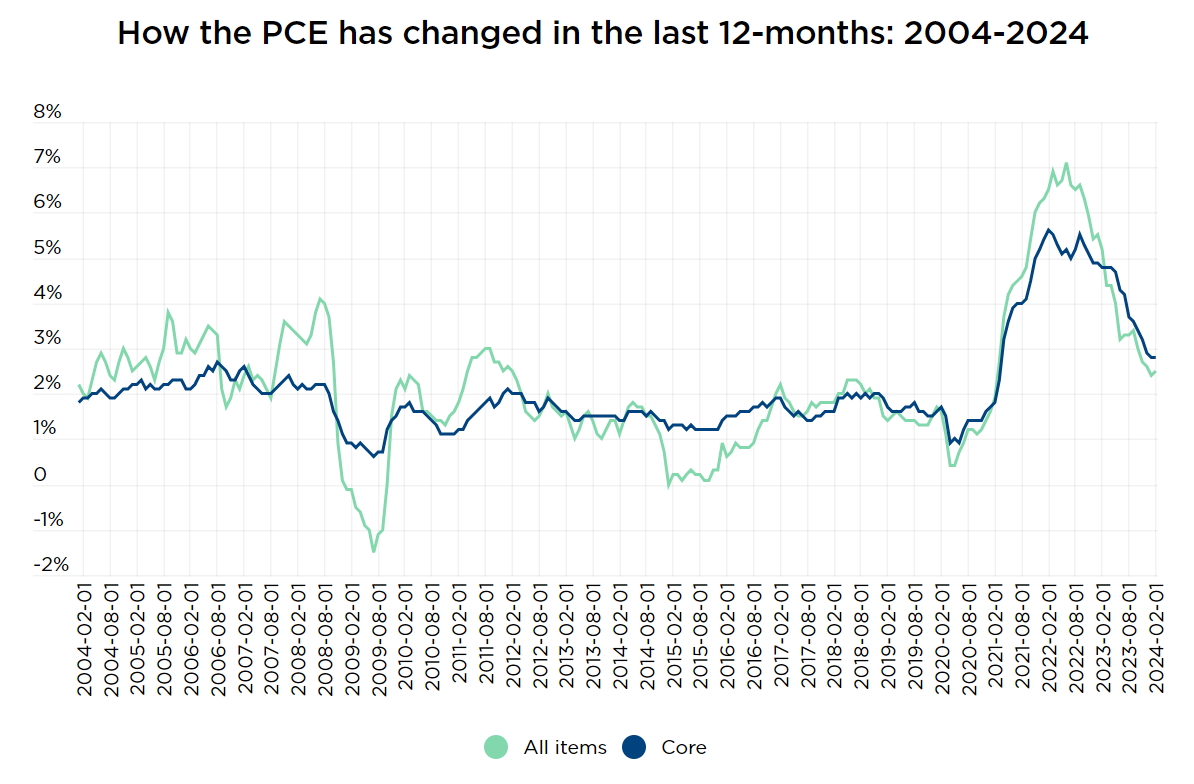

In [60]:
economics.shape

(574, 6)

In [61]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


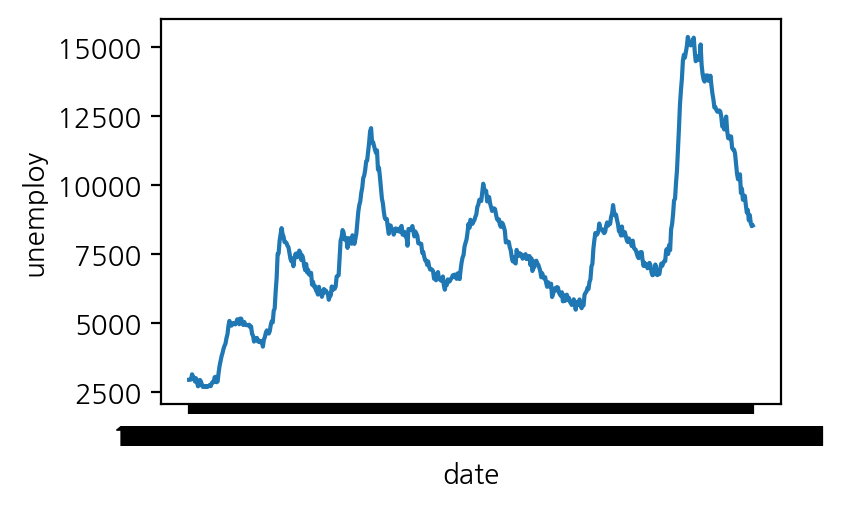

In [62]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy');

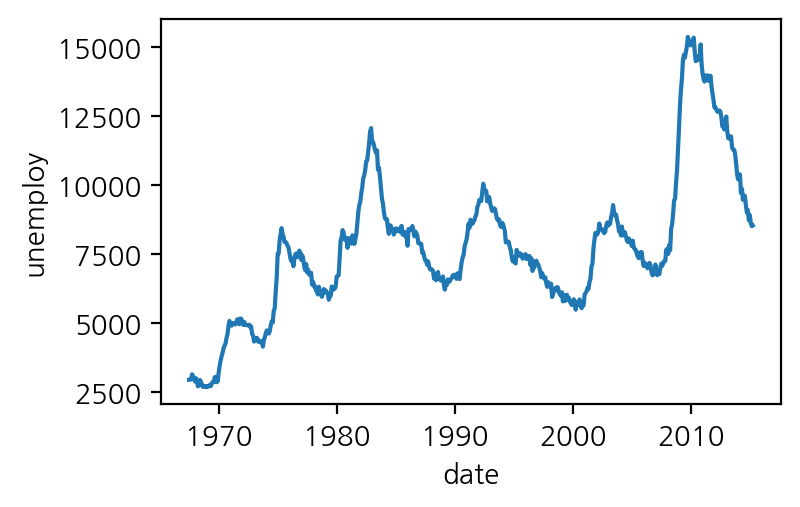

In [63]:
sns.lineplot(data = economics, x = pd.to_datetime(economics['date']), y = 'unemploy');

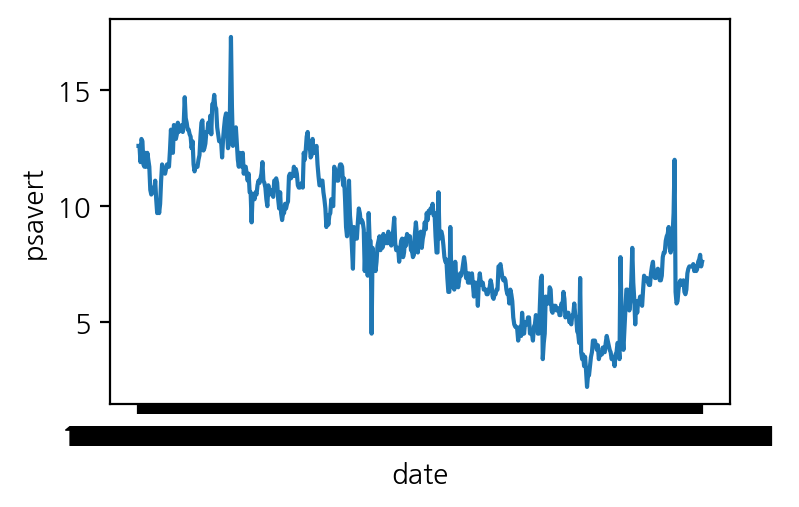

In [64]:
sns.lineplot(data = economics, x = 'date', y = 'psavert');

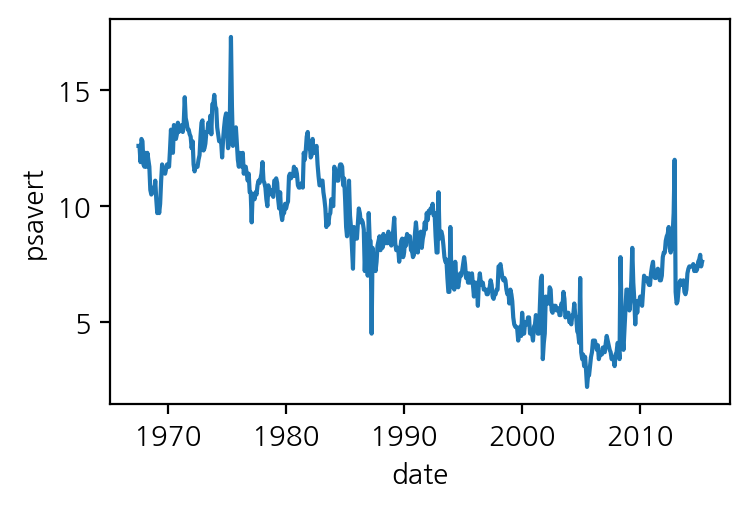

In [65]:
sns.lineplot(data = economics, x = pd.to_datetime(economics.date), y = 'psavert');

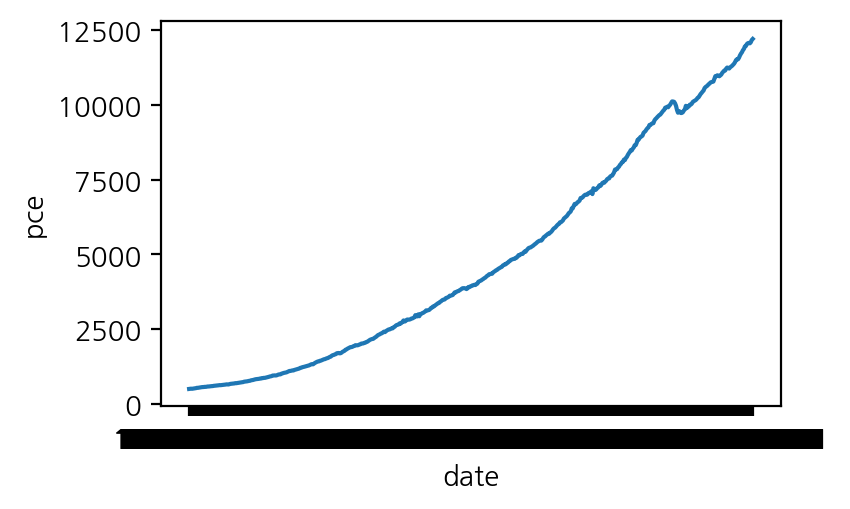

In [66]:
sns.lineplot(data = economics, x = 'date', y = 'pce');

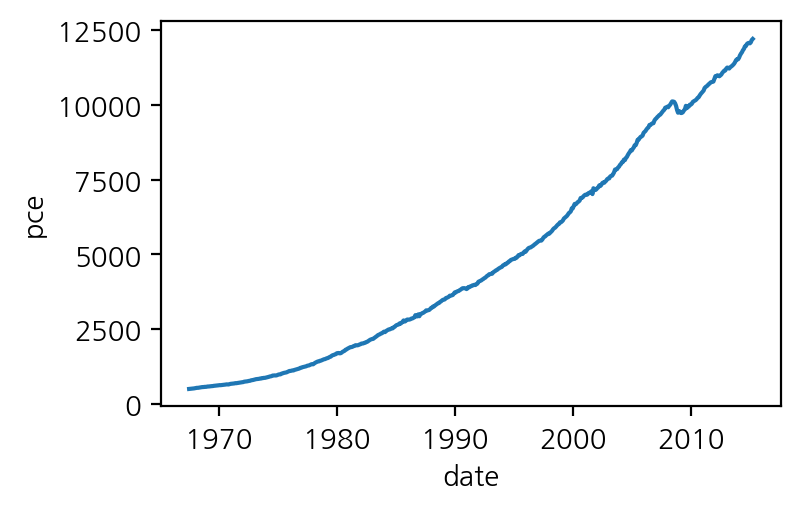

In [67]:
sns.lineplot(data = economics, x = pd.to_datetime(economics.date), y = 'pce');

#### x축에 연도 표시하기

**(1) 날짜 시간 타입 변수 만들기**

In [68]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [69]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [70]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [71]:
# 연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [72]:
# 월 추출
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [73]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

**(2) 연도 변수 만들기**

In [74]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


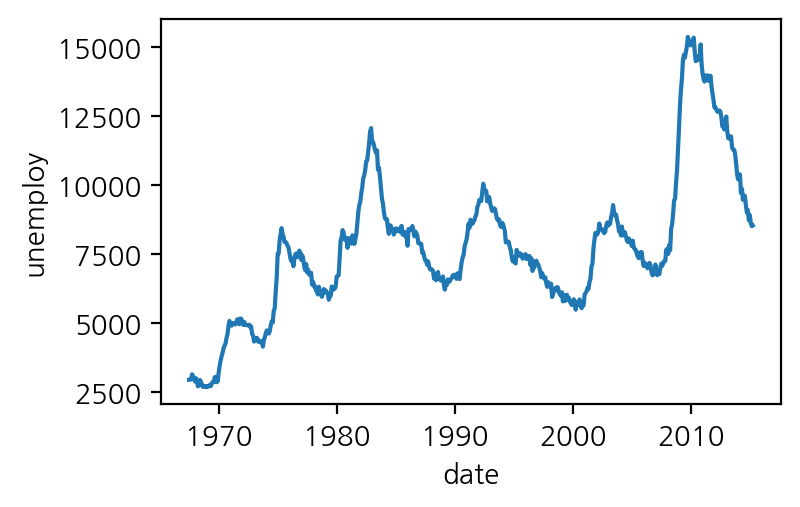

In [75]:
sns.lineplot(data = economics, x = pd.to_datetime(economics['date']), y = 'unemploy');

**(3) x축에 연도 표시하기**

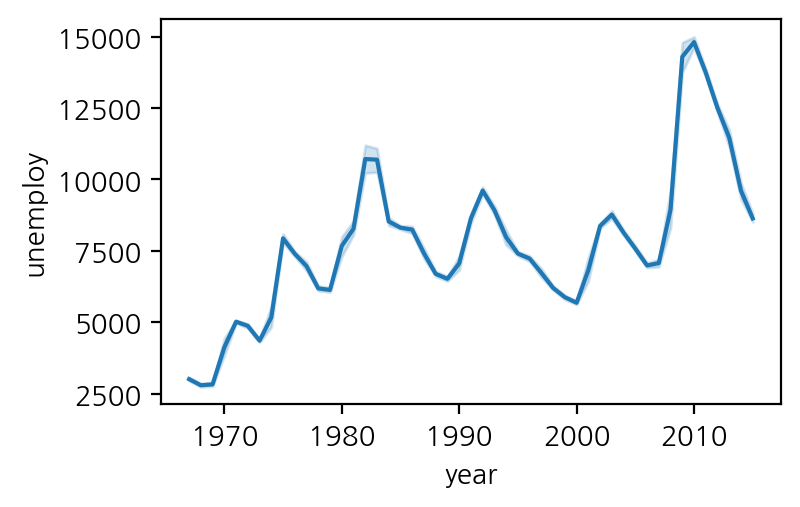

In [76]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy');

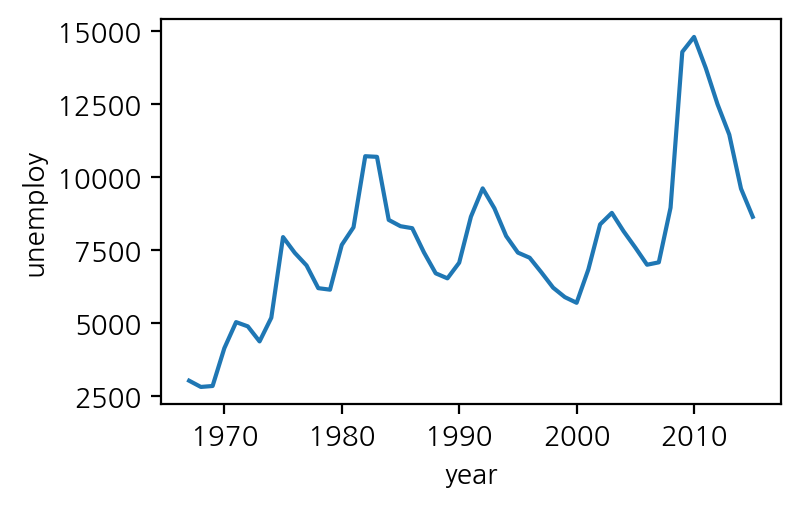

In [77]:
# 신뢰구간(오류막대) 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar = None);

## 08-5 상자 그림 - 집단 간 분포 차이 표현하기

### 상자 그림 만들기

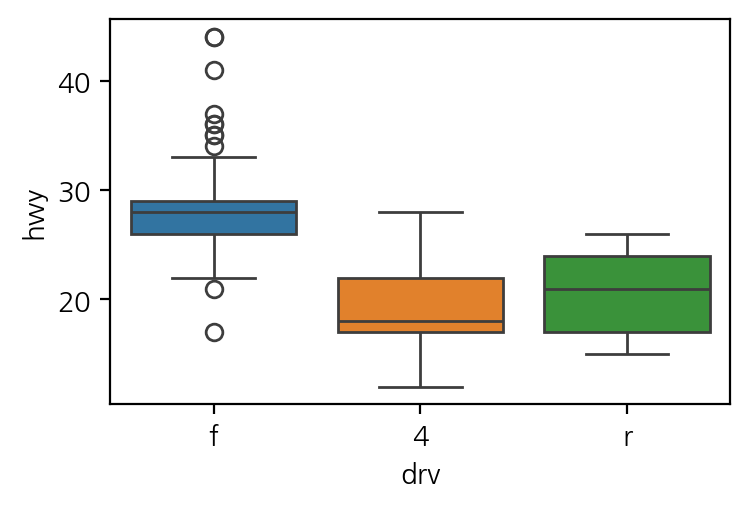

In [78]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy', hue = 'drv');

In [119]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [6, 3]})        # 그림 크기, 기본값 [6, 4]

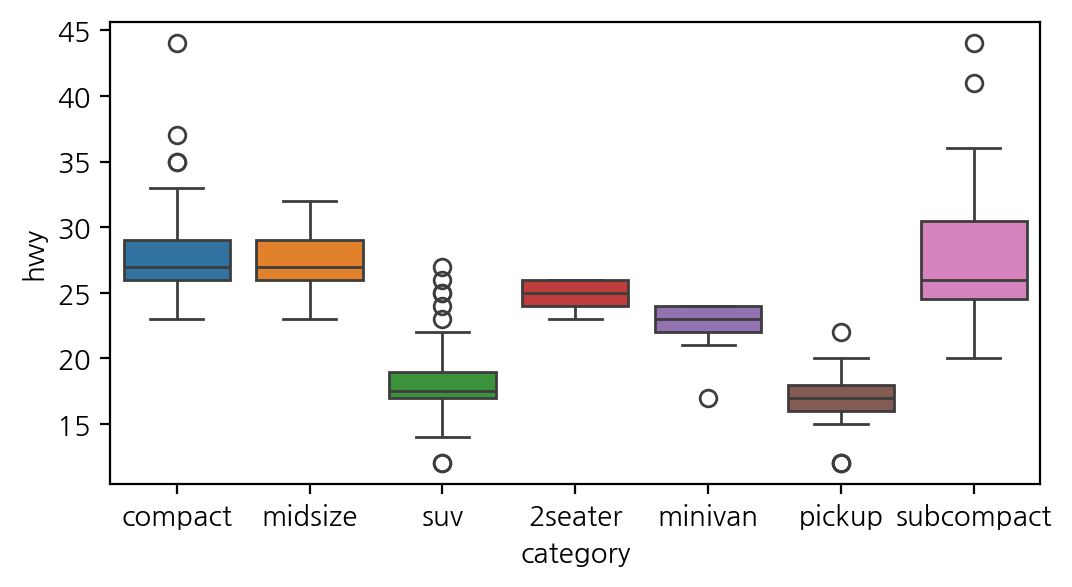

In [80]:
sns.boxplot(data = mpg, x = 'category', y = 'hwy',  hue = 'category');

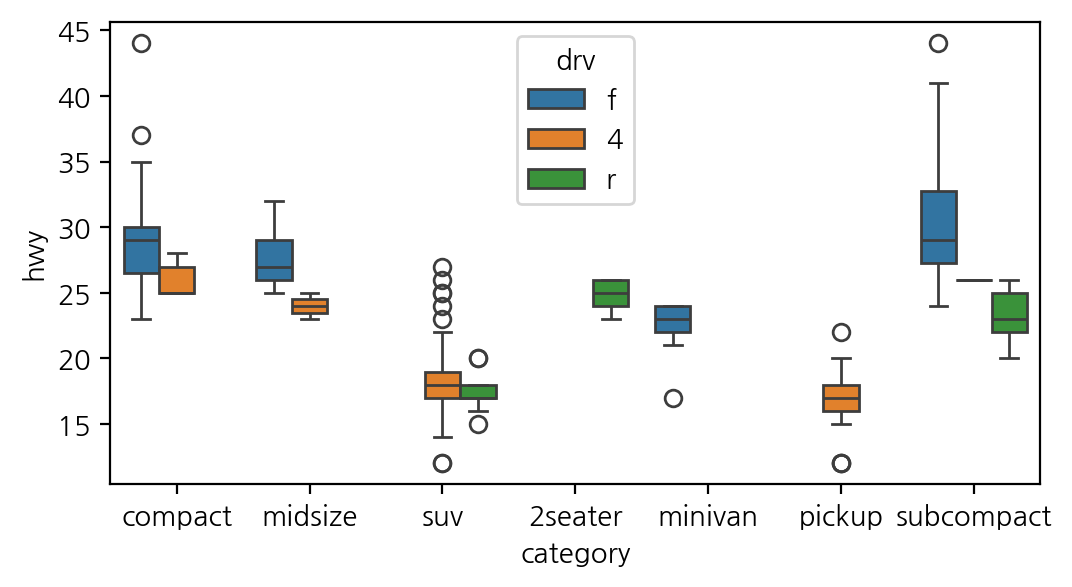

In [122]:
sns.boxplot(data = mpg, x = 'category', y = 'hwy', hue = 'drv');
#o 이상값

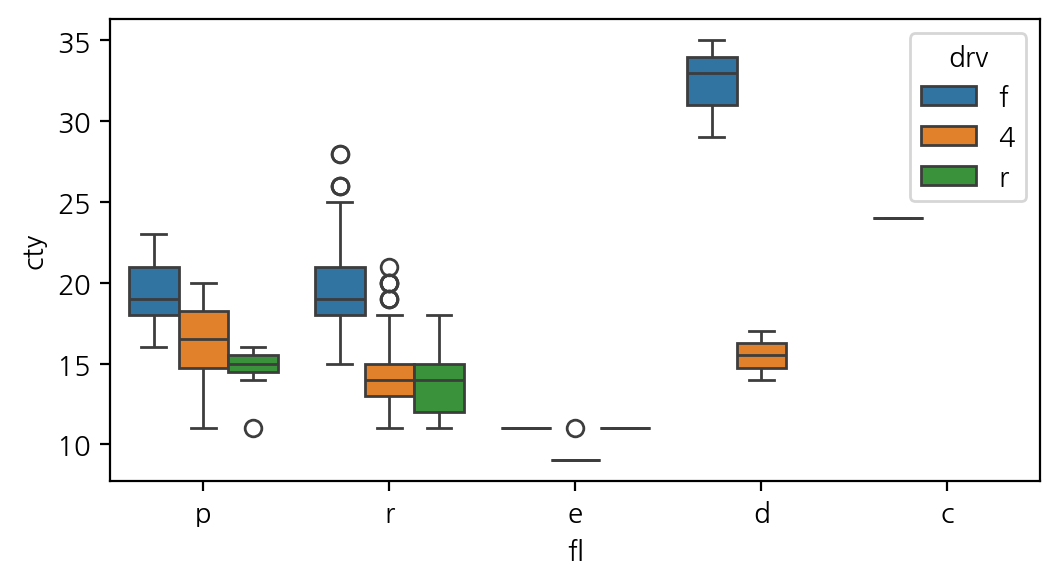

In [121]:
sns.boxplot(data = mpg, x = 'fl', y = 'cty', hue = 'drv');

In [83]:
mpg.query('fl == "e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [84]:
mpg[mpg.fl == "e"]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [85]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

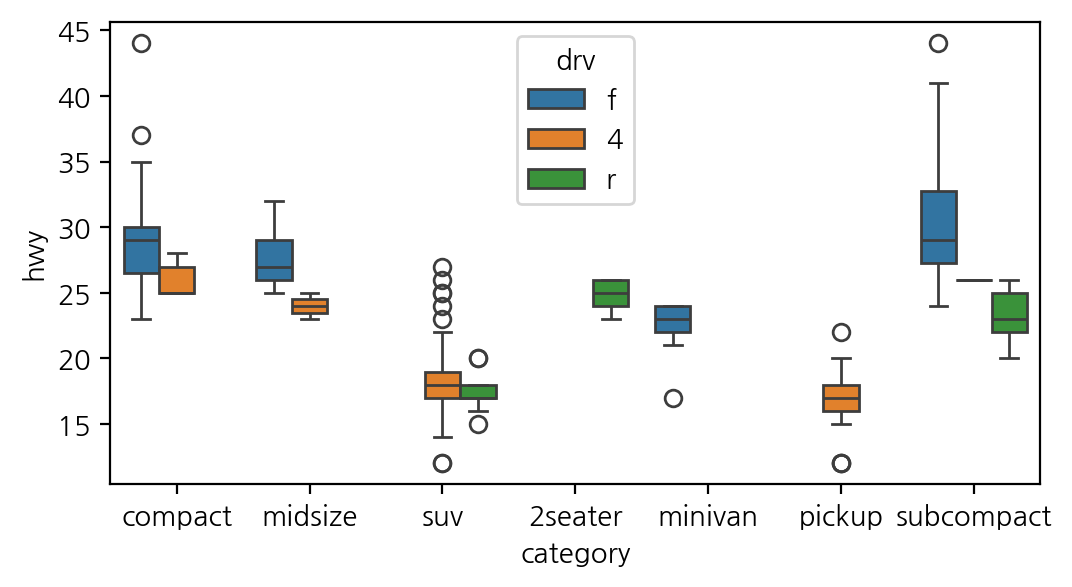

In [86]:
sns.boxplot(data = mpg, x = 'category', y = 'hwy', hue = 'drv');

------------------------------------------------------------------------

### 정리하기

| seaborn 함수      | 그래프                    |
|-------------------|---------------------------|
| sns.scatterplot() | 산점도                    |
| sns.barplot()     | 막대 그래프 - 요약표 활용 |
| sns.countplot()   | 막대 그래프 - 원자료 활용 |
| sns.lineplot()    | 선 그래프                 |
| sns.boxplot()     | 상자 그림                 |

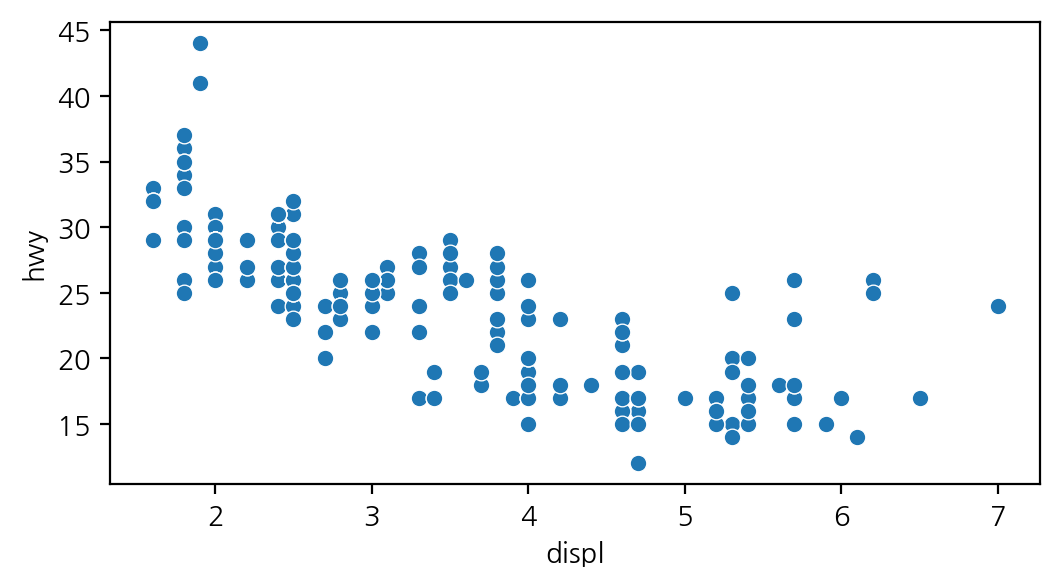

In [87]:
### 1. 산점도
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

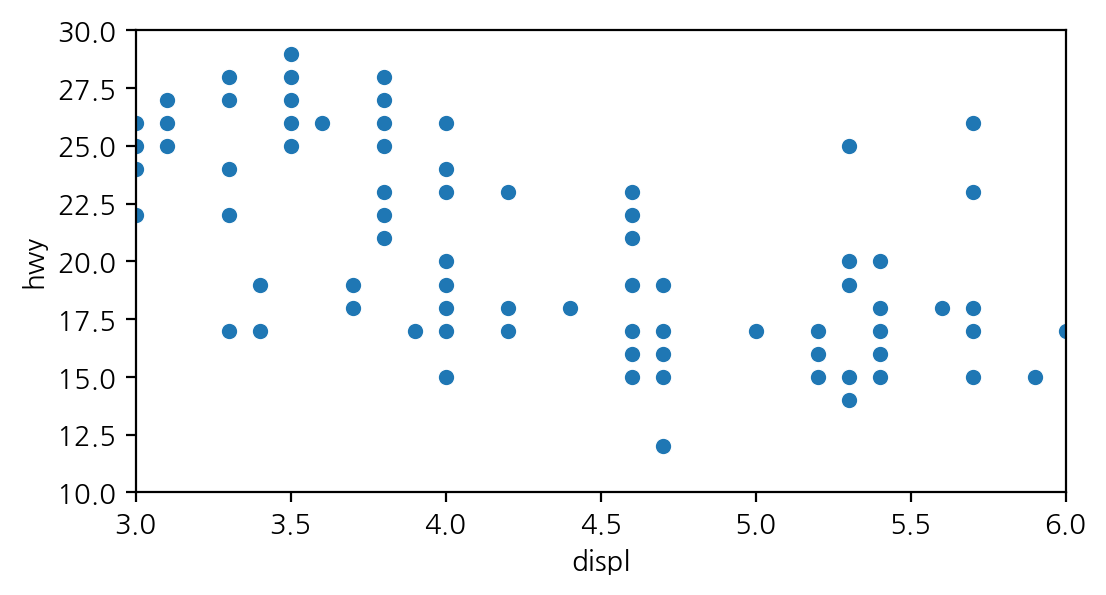

In [88]:
# 축 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3, 6], ylim = [10, 30]);

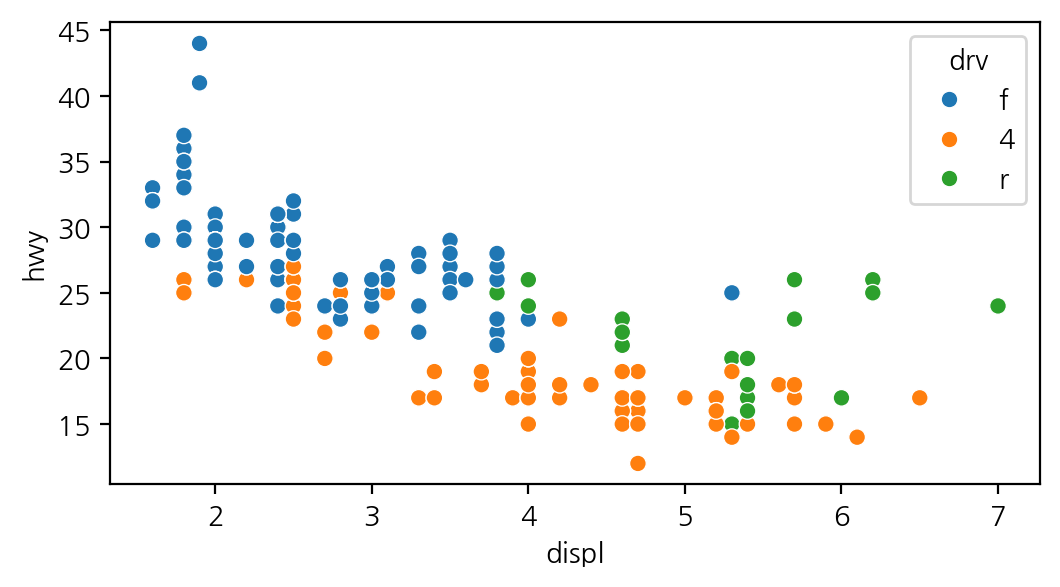

In [89]:
# 종류별로 표식 색깔 바꾸기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv');

In [90]:
### 2. 막대 그래프
## 평균 막대 그래프
# 1단계. 평균표 만들기
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


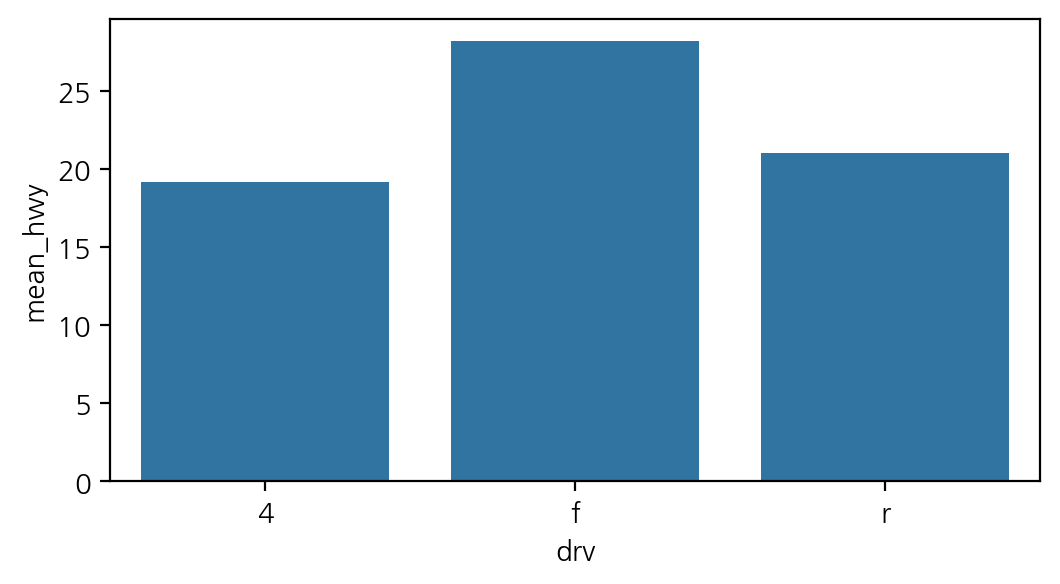

In [91]:
# 2단계. 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

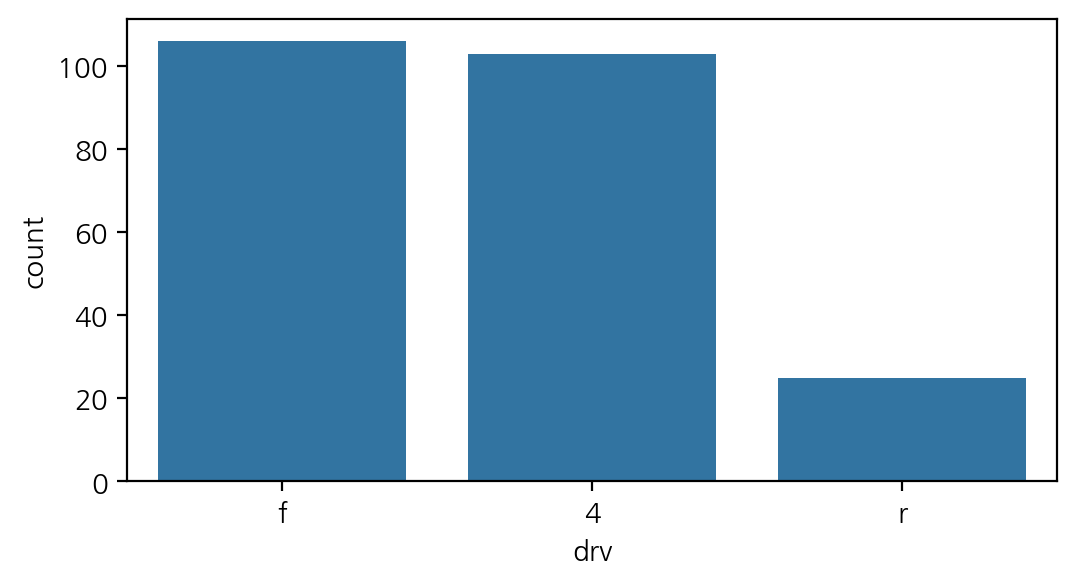

In [92]:
## 빈도 막대 그래프
sns.countplot(data = mpg, x = 'drv');

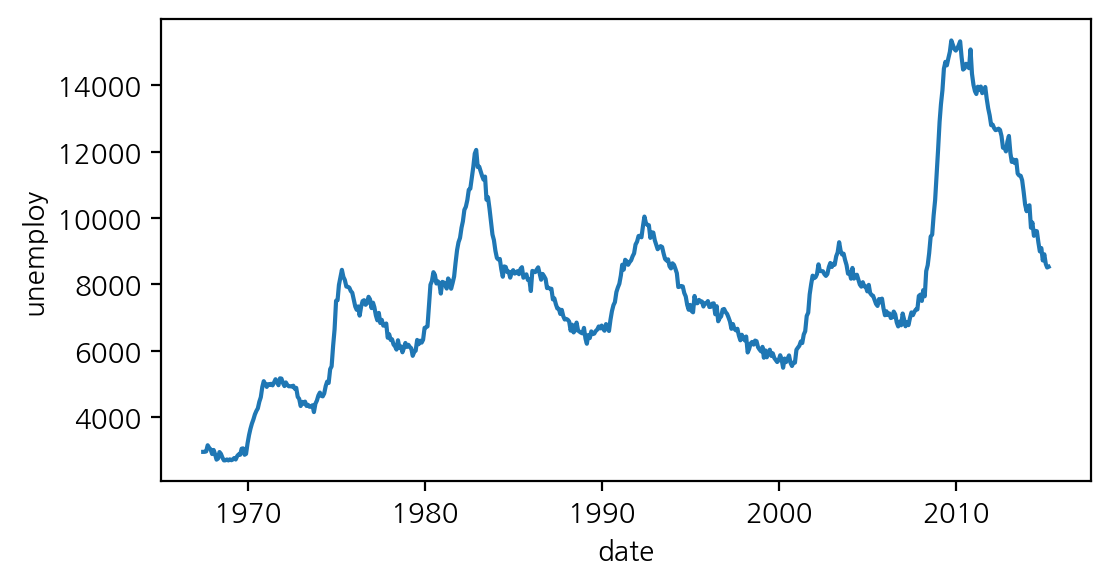

In [93]:
### 3. 선 그래프
sns.lineplot(data = economics, x = pd.to_datetime(economics.date), y = 'unemploy');

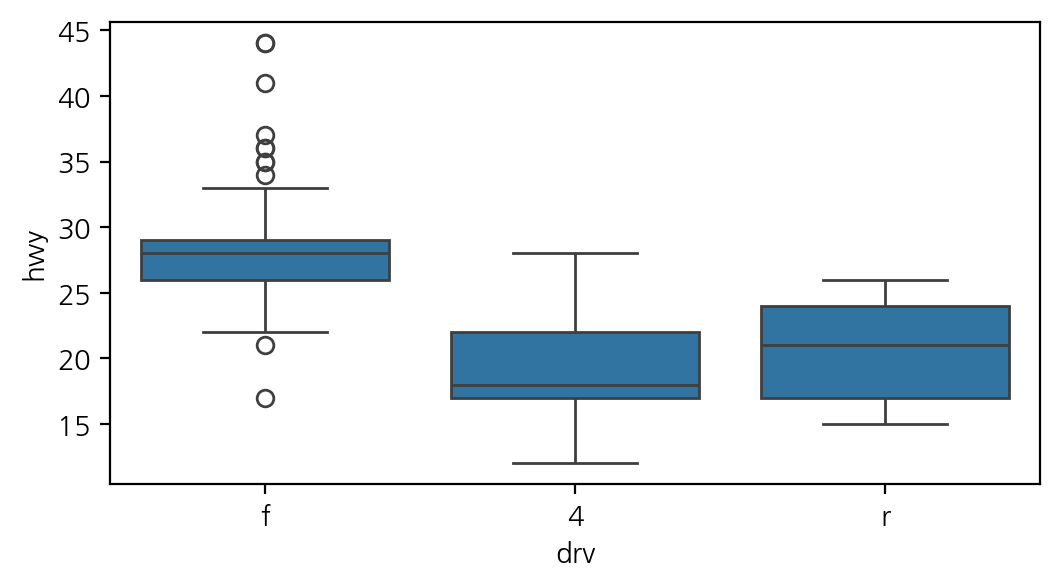

In [94]:
### 4. 상자 그림
sns.boxplot(data = mpg, x = 'drv', y = 'hwy');

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


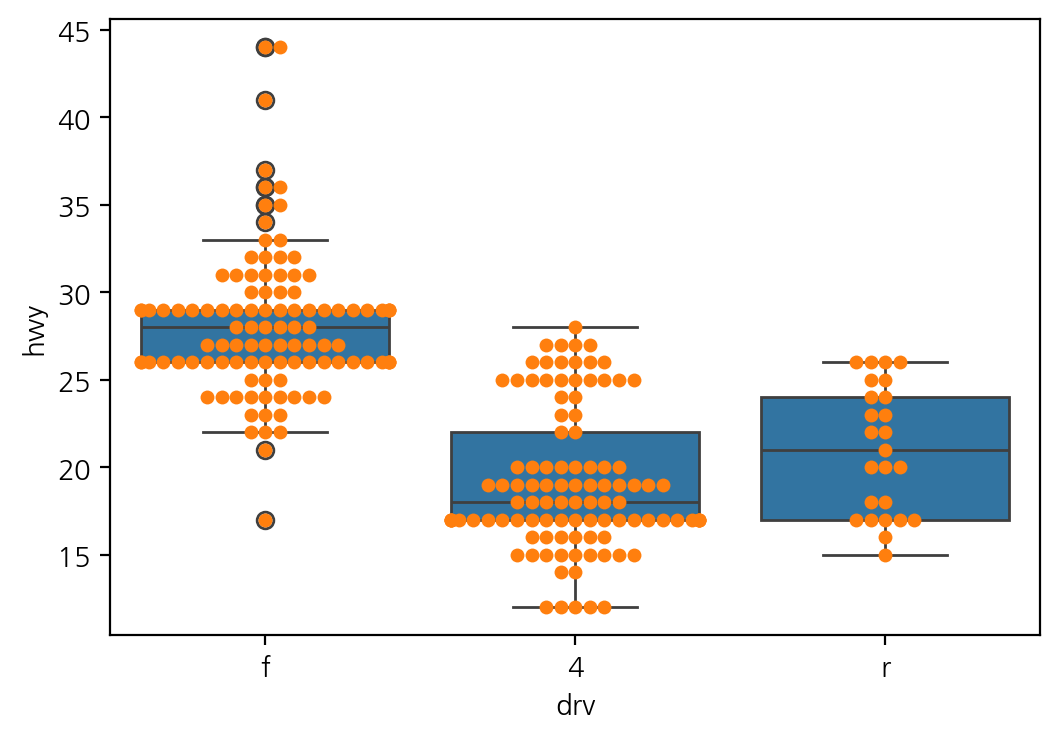

In [124]:
# plt.rcParams.update({'figure.figsize' : [5, 3]})        # 그림 크기, 기본값 [6, 4]
plt.rcParams.update({'figure.figsize': [6, 4]})
sns.boxplot(data = mpg, x = 'drv', y = 'hwy');
sns.swarmplot(data = mpg, x = 'drv', y = 'hwy');

In [96]:
mpg[mpg.hwy > 34].sort_values(by=["hwy"], ascending=[False])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact


In [97]:
mpg[mpg.hwy < 15].sort_values(by=["hwy"], ascending=[True])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
129,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv


### 박스상자의 구성요소
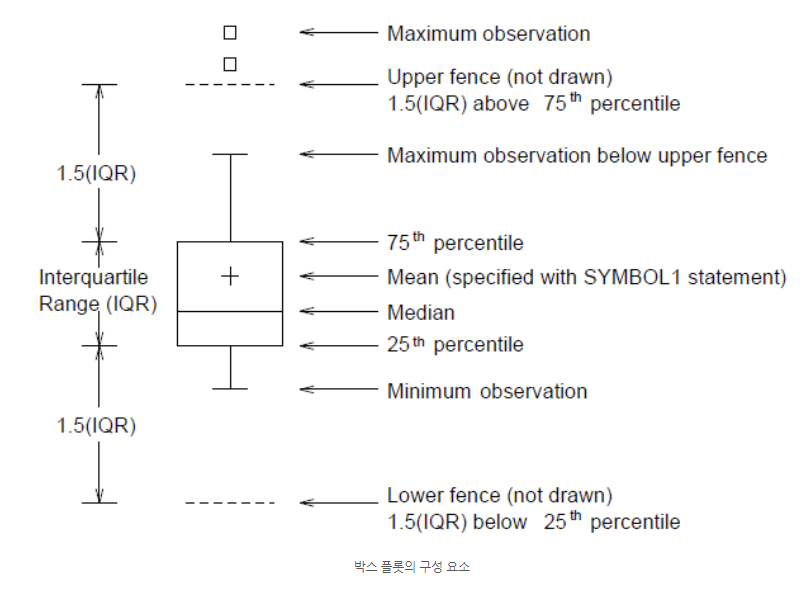

## **시험 문제**

### 가로로 합치기 merge(): 행의 선택은?

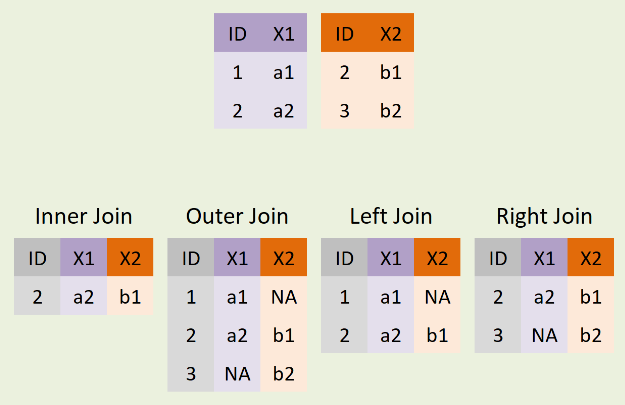

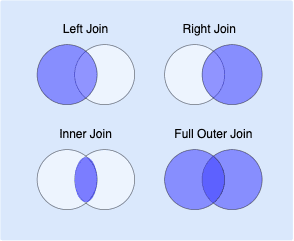

In [98]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})

In [99]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [100]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,6,95
4,7,80


In [101]:
test1.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id</th>\n      <th>midterm</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>80</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>70</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>4</td>\n      <td>90</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>5</td>\n      <td>85</td>\n    </tr>\n  </tbody>\n</table>'

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>midterm</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>60</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>80</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>70</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>90</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>85</td>
    </tr>
  </tbody>
</table>

In [102]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [103]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [104]:
display_side_by_side(test1, test2, test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [129]:
test1.merge(test2, how='inner').shape

(3, 3)

In [131]:
len(test1.merge(test2, how='inner'))

3

In [125]:
test1.merge(test2, how='inner').iloc[1, 2]

83

In [106]:
display_side_by_side(test1, test2, test1.merge(test2, how='left'))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [107]:
display_side_by_side(test1, test2, test1.merge(test2, how='right'))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [108]:
display_side_by_side(test1, test2, test1.merge(test2, how='outer'))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [109]:
display_side_by_side(test1, test2, test1.merge(test2, how='cross'))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


### merge cross

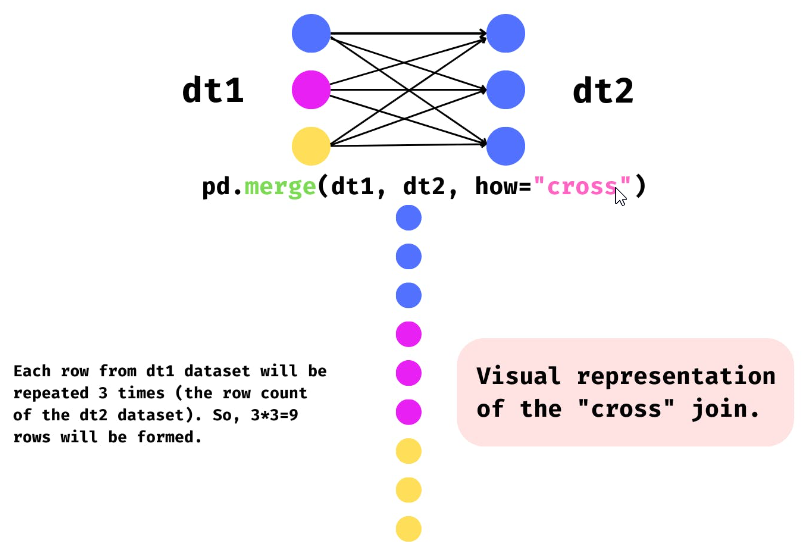

## 결측치 시각화

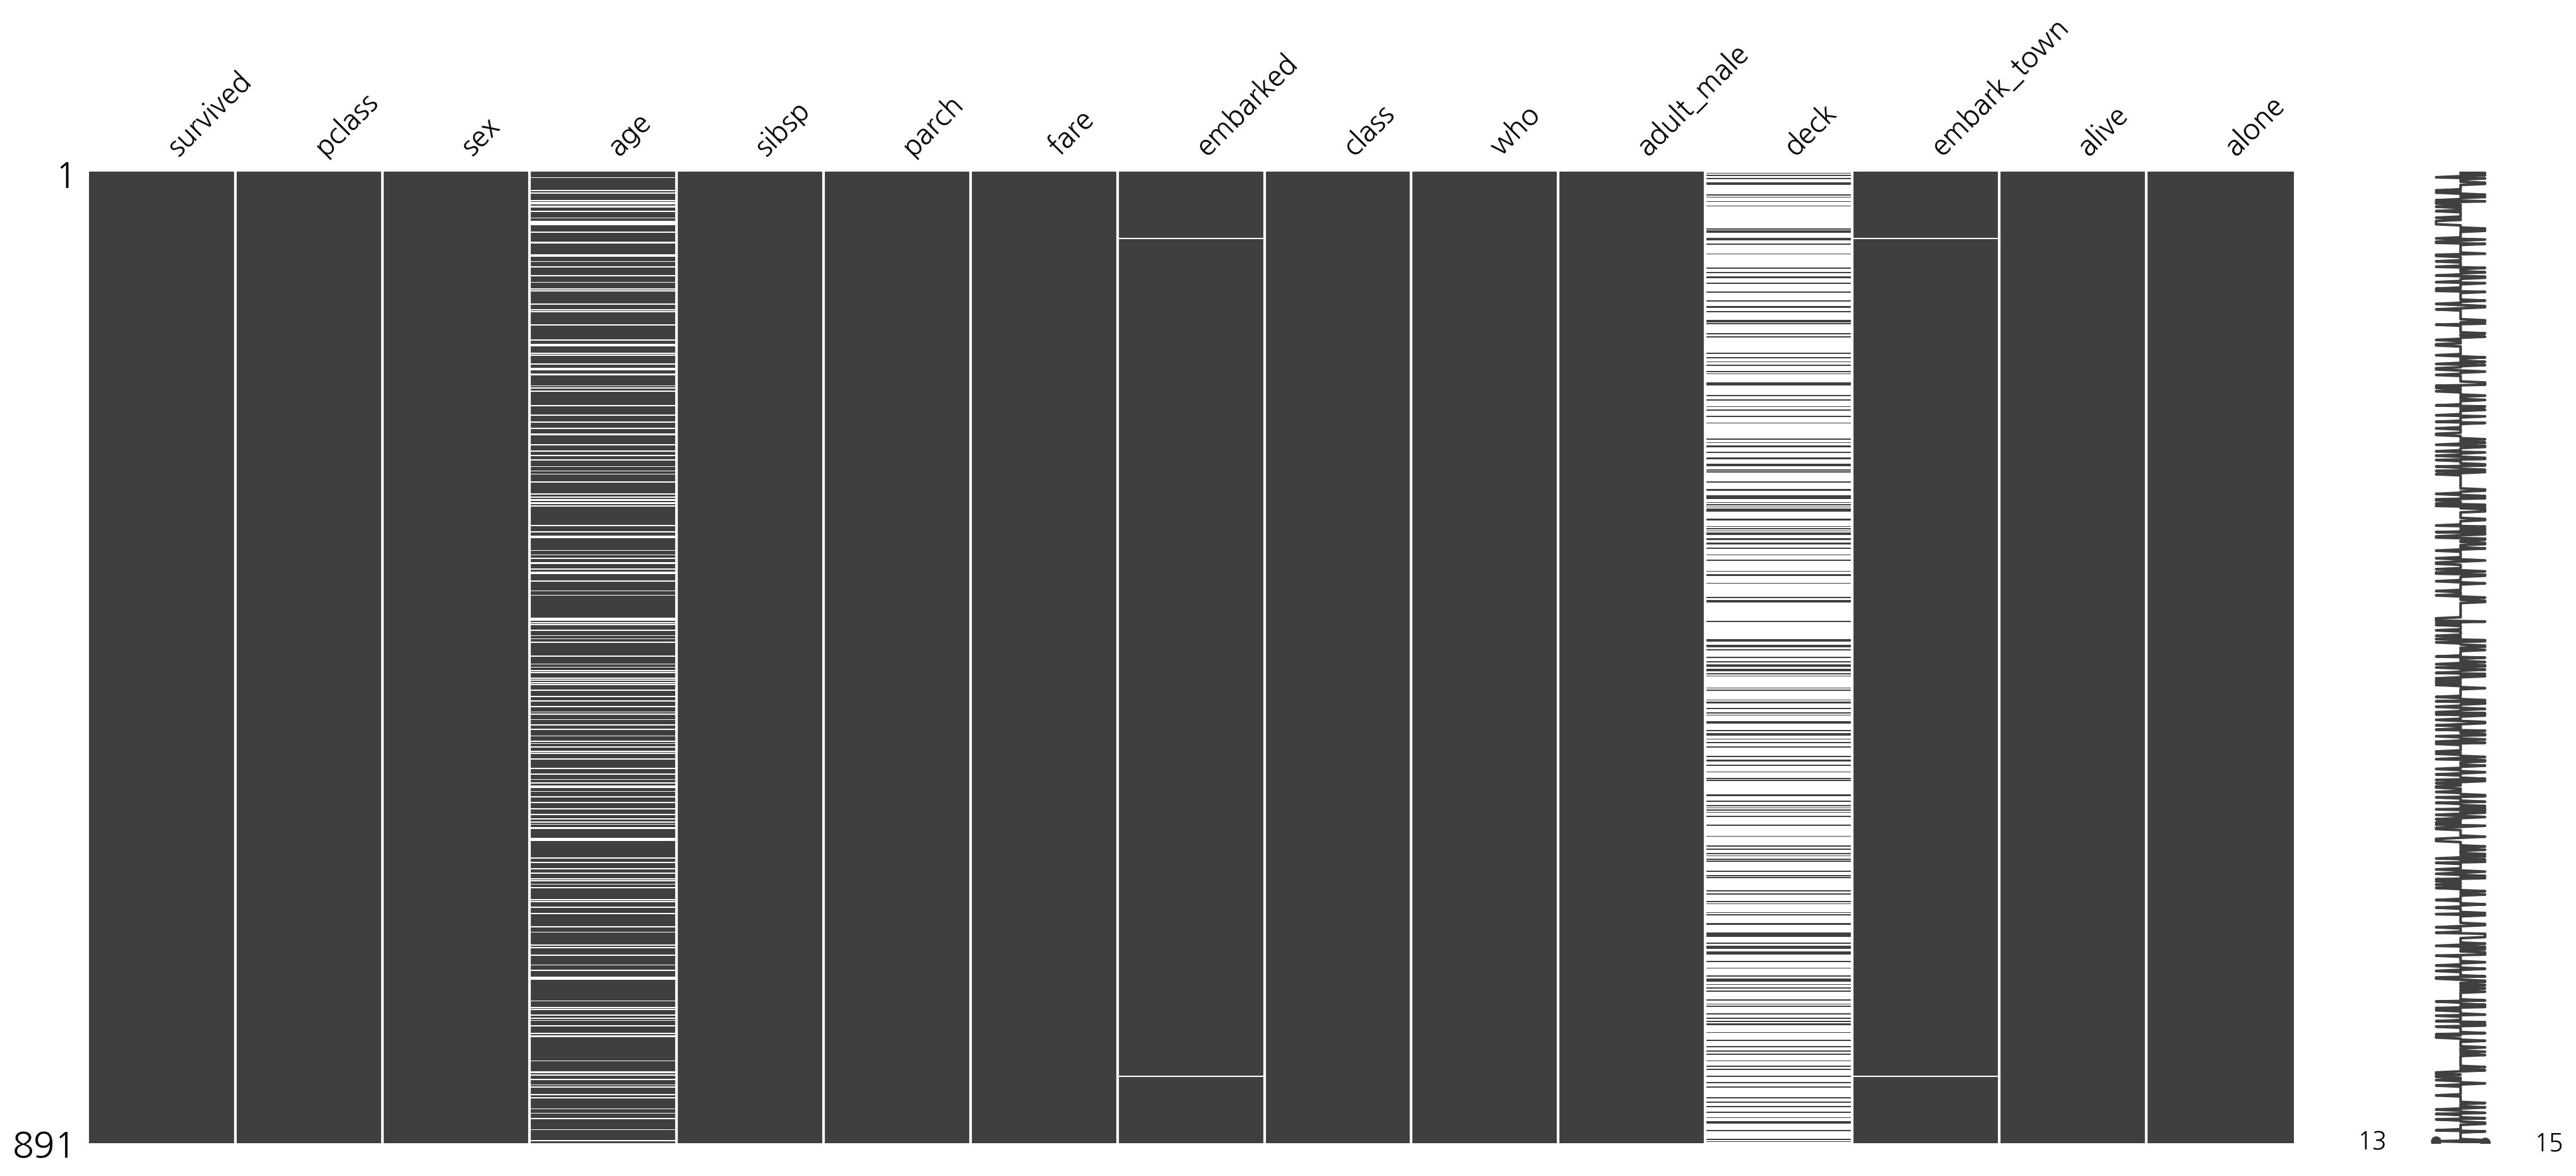

In [110]:
import missingno as msno
import seaborn as sns
tdf = sns.load_dataset('titanic')

msno.matrix(tdf);

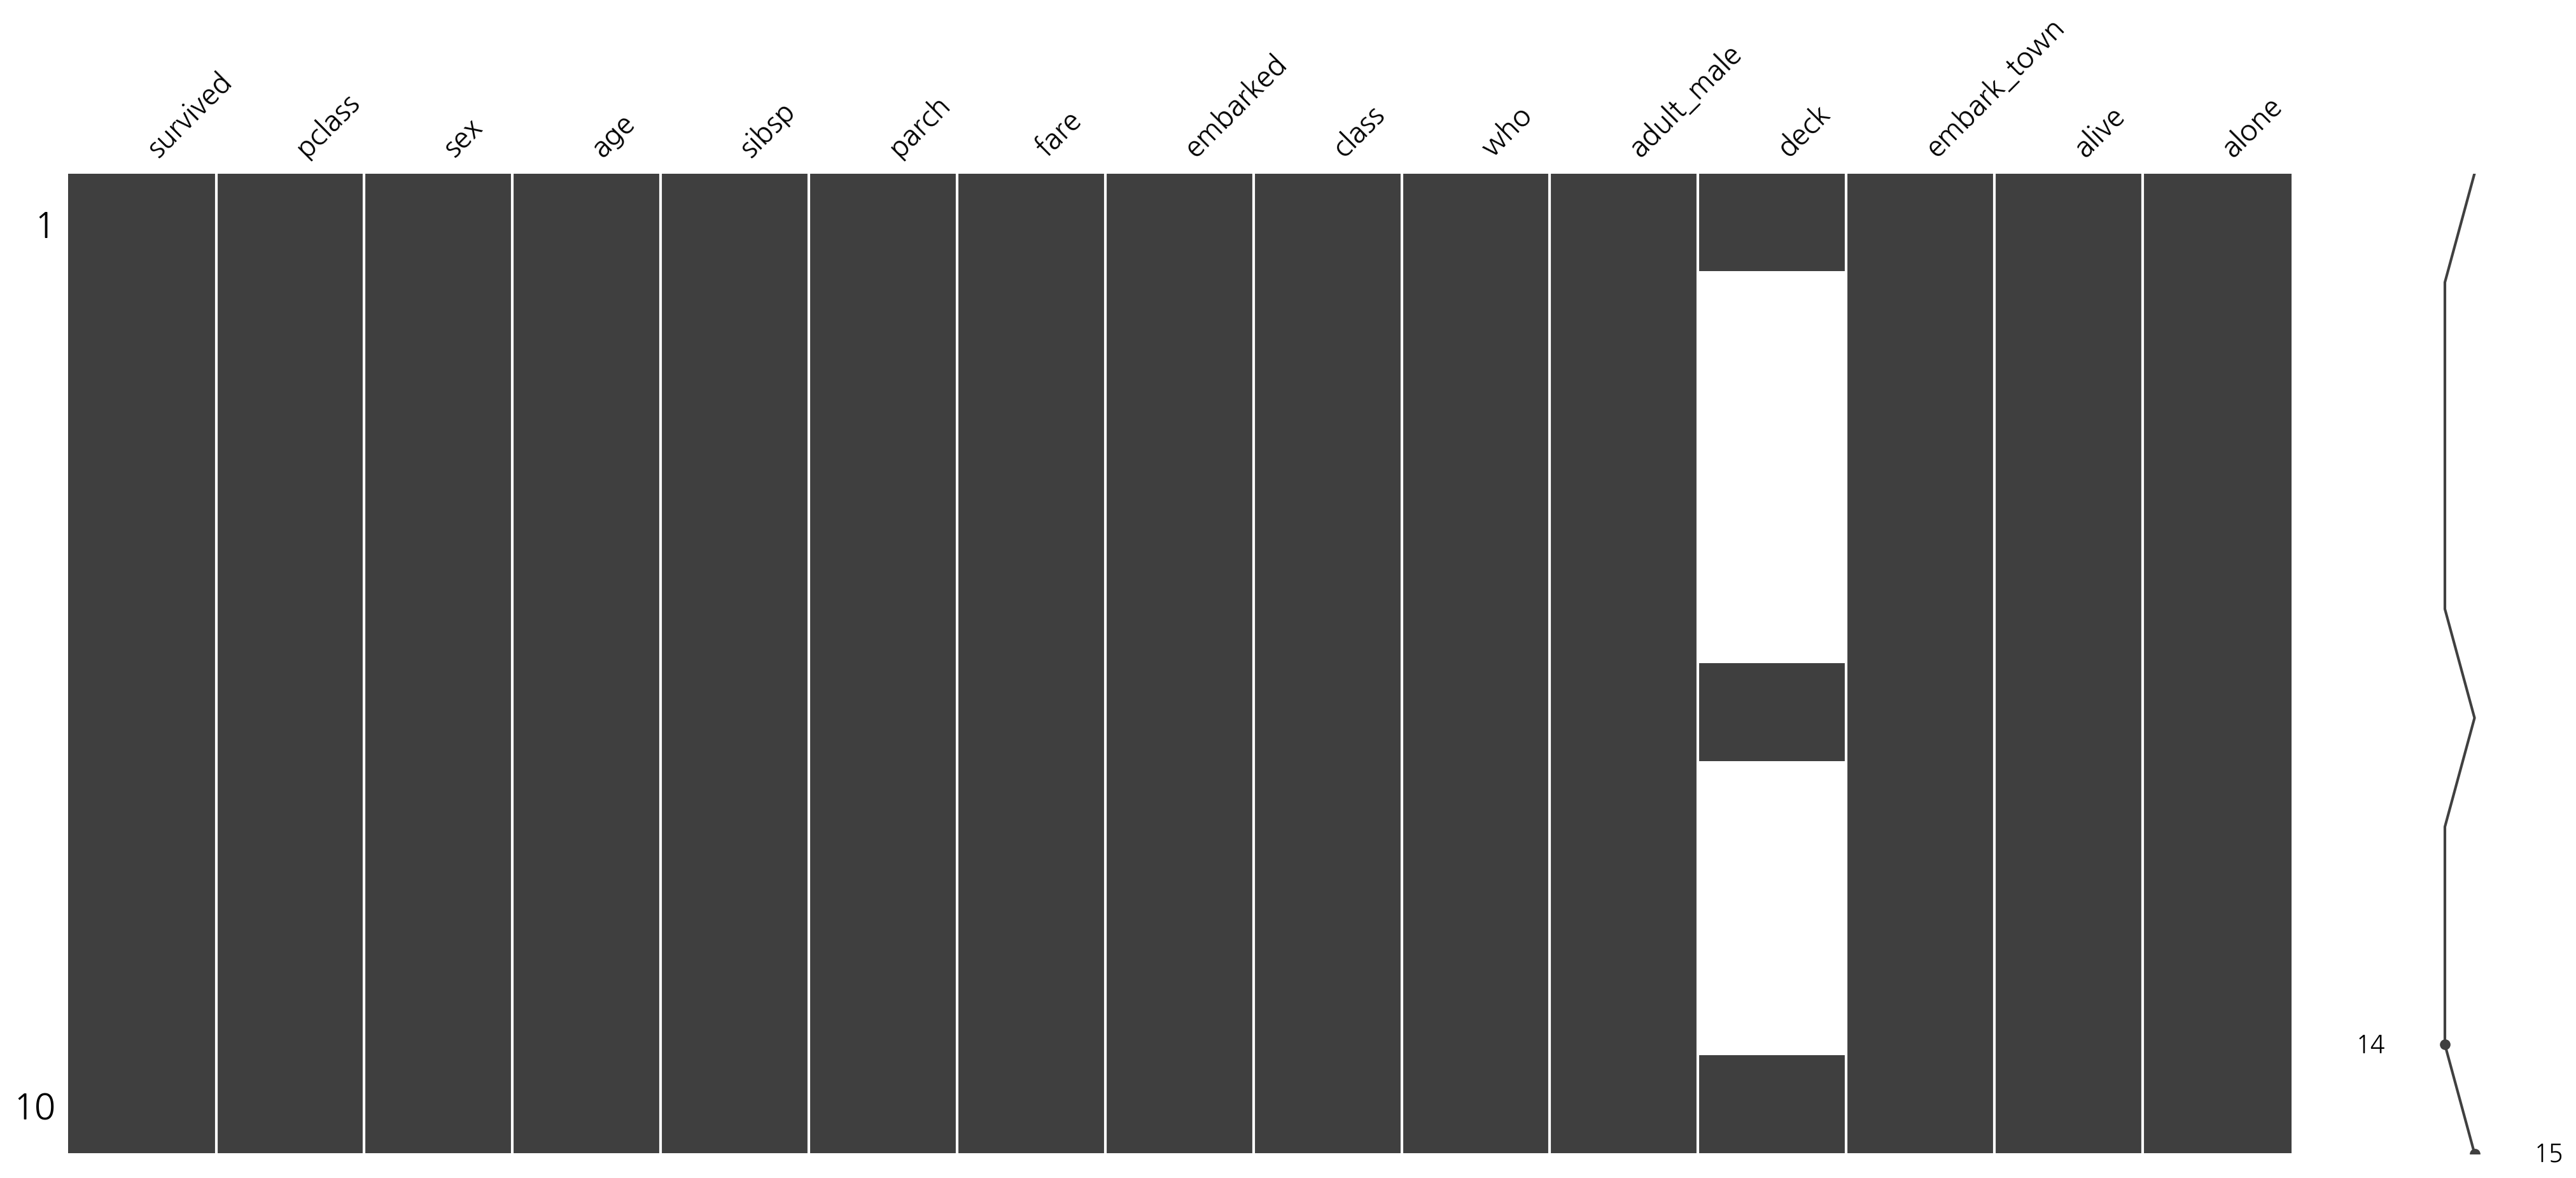

In [111]:
msno.matrix(tdf.sample(10));

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
    - 행마다 15개중 NaN이 아닌 유효한 데이터의 갯수를 나타내고
    - 그 점을 다음 행과 연결한 선

# 종료